# 한글폰트 사용 in colab

In [290]:

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [291]:
# # 단계 1: 폰트 설치
# import matplotlib.font_manager as fm

# !apt-get -qq -y install fonts-nanum > /dev/null
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 단계 2: 런타임 재시작
# import os
# os.kill(os.getpid(), 9)

In [292]:
# # 단계 3: 한글 폰트 설정
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# # 마이너스 표시 문제
# mpl.rcParams['axes.unicode_minus'] = False
	
# # 한글 폰트 설정
# path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
# font_name = fm.FontProperties(fname=path, size=18).get_name()
# plt.rc('font', family=font_name)
# fm._rebuild()

In [293]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [294]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import 

In [295]:
import pandas as pd
import numpy as np
import collections

import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.patches as mpatches #범례 그리기 위한 라이브러리

# 워드클라우드
from wordcloud import WordCloud
import PIL

## Set CFG

In [296]:
class CFG:
    SEED = 42
    PATH = "/content/drive/MyDrive/Dacon/FIANL_MOVIE_RECOM/"
    

## Load Dataset

In [297]:
with open(f"{CFG.PATH}DATA/fillna_movie.csv", 'r',encoding='utf-8') as f:
    data = pd.read_csv(f)
data.head(3)

id     title                                             poster  \
0  10526    블러드 심플  https://movie-phinf.pstatic.net/20190926_233/1...   
1  10621        이창  https://movie-phinf.pstatic.net/20160725_260/1...   
2  13481  지상 최대의 쇼  https://movie-phinf.pstatic.net/20200219_193/1...   

   director                  cast       genre nation  running_time  \
0     조엘 코엔  존 게츠|프란시스 맥도맨드|댄 헤다야  스릴러|범죄|드라마     미국     96.000000   
1  알프레드 히치콕              제임스 스튜어트    스릴러|미스터리     미국    112.000000   
2  세실 B. 드밀   베티 허튼|코넬 와일드|찰톤 헤스톤        정보없음     미국    100.365884   

  release_date  ratings                                           synopsis  \
0     20191017  15세 관람가  삐뚤어진 욕망, 한 번의 잘못된 선택  \n추잡한 비극이 시작된다!텍사스의 한마을,...   
1     19570224  15세 관람가  사진작가 제프는 카레이싱 촬영 도중 다리를 다쳐 휠체어에 의지한 채 자신의 방에서 ...   
2     19550520     정보없음  서커스단의 갖가지 애환을 큰 스케일로 그린 대작. 스츄어트는 항상 분장을 지우지않는...   

             keyword  status  avg_grade  viewer  cnt_click  
0     선택|애비|레이|비저|욕망       0        8.8      48          0  
1     제프|남편|주변|이웃|시작       1       10.4      45          0  
2  작품|서커스|갖가지|애환|스케일       1        7.1       7          0

# set drawing graph functions

In [298]:
def print_text( x ,  y ):
        plt.text(x, y+.125  , y , fontsize = 14, color='black',
                 horizontalalignment='center', verticalalignment='bottom',) 
        
def draw_bar( x , y , label    ):
    colors = sns.color_palette('hls',len(x)) ## 색상 지정
    font_size = 15

    fig = plt.figure(figsize=(23,8)) ## 캔버스 생성
    plt.bar(  x, y ,color = colors)
    plt.xticks(x, size = font_size-1)
    plt.title(label[0],size = font_size+2)
    plt.xlabel(label[1],size = font_size)
    plt.ylabel(label[2],size = font_size)
        
    for i, v in enumerate( x ):
        if type(y)!=list and y.iloc[i] >0 :  
            print_text( v , y.iloc[i] )

        elif type(y)==list:
            plt.text(v, y[i]  , y[i] , fontsize = font_size, color='black',
                 horizontalalignment='center', verticalalignment='bottom',)
    
    plt.show()

set_colors = ['red', 'gold', 'blue','black', ]
def draw_multi_bar( df , x , lst ,legend_lst=[] ,set_colors = set_colors ):
    
    df.plot.bar(legend='reverse' , figsize=(25,10) , width = 0.8 , color = set_colors)
    plt.xticks( np.arange(  len(x) )  ,  x ,fontsize=font_size , rotation=0)


    #범례 커스터마이징 ( 문구 & 색 지정정)
    if len(legend_lst) == 3:
        variable_x = mpatches.Patch(color = set_colors[0], label=legend_lst[0])
        variable_y = mpatches.Patch(color = set_colors[1],label=legend_lst[1])
        variable_z = mpatches.Patch(color = set_colors[2],label=legend_lst[2])
        plt.legend(handles=[variable_x, variable_y, variable_z],fontsize=font_size)
    if len(legend_lst) == 4:
        variable_x = mpatches.Patch(color = set_colors[0], label=legend_lst[0])
        variable_y = mpatches.Patch(color = set_colors[1],label=legend_lst[1])
        variable_z = mpatches.Patch(color = set_colors[2],label=legend_lst[2])
        variable_a = mpatches.Patch(color = set_colors[3],label=legend_lst[3])
        plt.legend(handles=[variable_x, variable_y, variable_z,variable_a],fontsize=font_size)
        
    plt.title(lst[0],size = font_size+5)
    plt.xlabel(lst[1],size = font_size+2)
    plt.ylabel(lst[2],size = font_size+2)
    plt.show()

# 감독

## 상위 1% 다작 감독 리스트 


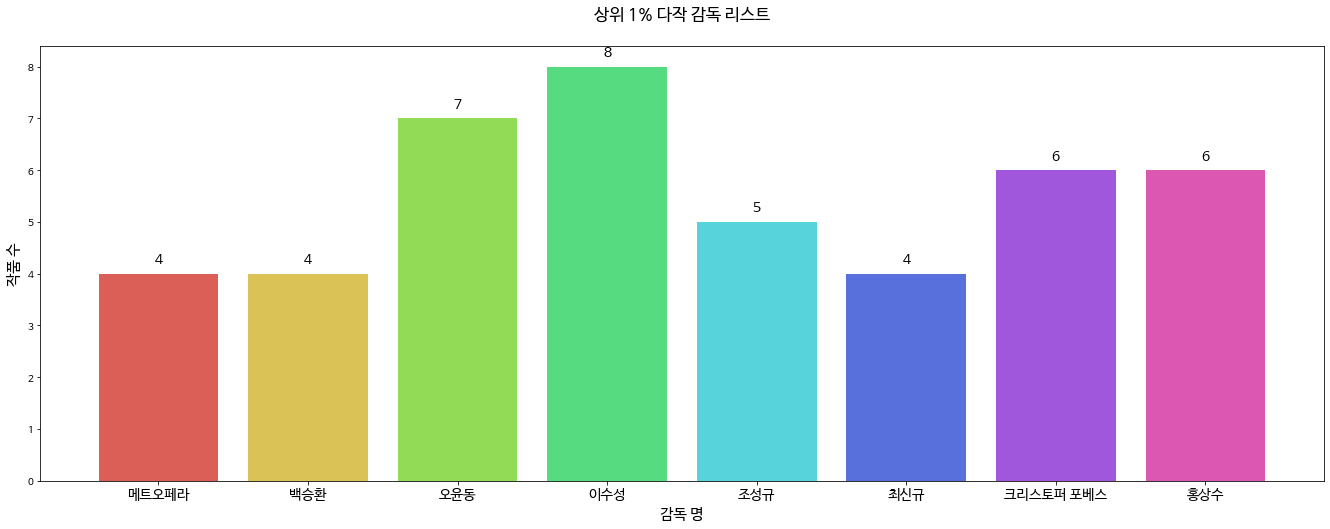

In [299]:
director_Df = data.groupby("director")["id"].count().reset_index().rename(columns = {"id":"count"})
                                            # 상위 1% 작품 수
dir_df = director_Df[director_Df["count"] >  director_Df["count"].quantile(0.99)  ]

# 정보없음 제외
for idx , name in enumerate(dir_df["director"]):
    if name == "정보없음":
        dir_df = dir_df.drop(  dir_df.iloc[idx].reset_index().loc[1].index[1]     )

draw_bar( dir_df["director"].unique()  , dir_df["count"], [ "상위 1% 다작 감독 리스트\n", "감독 명",  "작품 수" ]   )


## 상위 1% 감독별 평균평점 

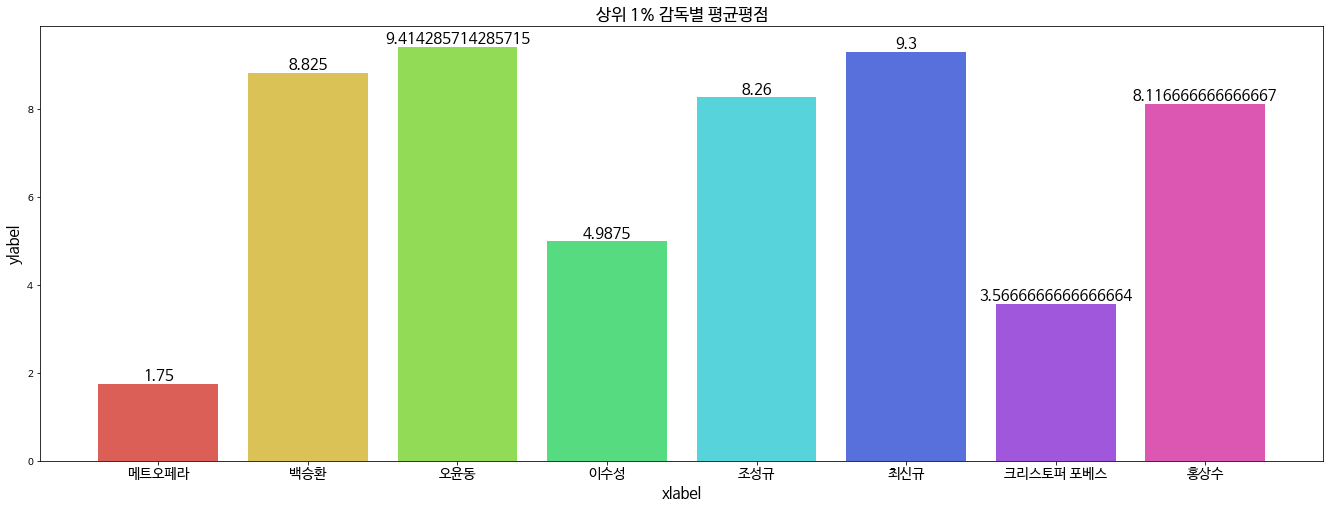

In [300]:
index_lst = dir_df.index
index_lst

dir_score_df = data.groupby("director")["avg_grade"].mean().iloc[index_lst]
draw_bar( dir_score_df.index , list(dir_score_df.values), ["상위 1% 감독별 평균평점" , "xlabel","ylabel"]    )

## 상위 1% 감독의 작품수 + 평균평점

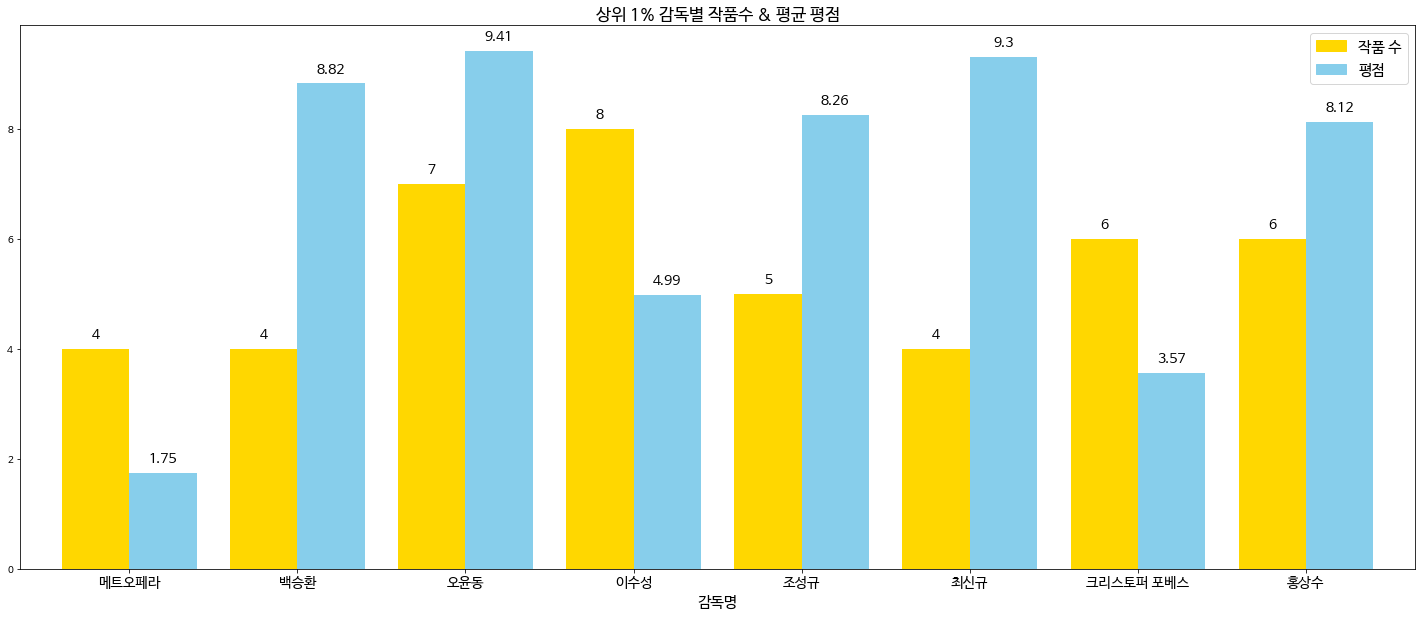

In [301]:
director_Df = data.groupby("director")["id"].count().reset_index().rename(columns = {"id":"count"})
                                            # 상위 1% 작품 수
dir_df = director_Df[director_Df["count"] >  director_Df["count"].quantile(0.99)  ]

# 정보없음 제외
for idx , name in enumerate(dir_df["director"]):
    if name == "정보없음":
        dir_df = dir_df.drop(  dir_df.iloc[idx].reset_index().loc[1].index[1]     )

dir_df = pd.merge ( dir_df ,data.groupby("director")["avg_grade"].mean().iloc[dir_df.index].reset_index() 
                    , how = "left",left_on= "director", right_on= "director")

colors = ['gold', 'skyblue',]
fontsize = 15
dir_df.plot.bar(legend='reverse' , figsize=(25,10) , width = 0.8,color = colors)
plt.xticks(np.arange(  len(dir_df) ),  dir_df.director ,size=fontsize-1 , rotation=0)

# #범례 커스터마이징 ( 문구 & 색 지정)
plt.title("상위 1% 감독별 작품수 & 평균 평점",size = fontsize+2)
variable_x = mpatches.Patch(color=colors[0],label=  "작품 수")
variable_y = mpatches.Patch(color=colors[1],label="평점")
plt.legend(handles=[variable_x, variable_y, ],fontsize=fontsize)

for i, v in enumerate( dir_df.director ):
    print_text( i-0.2, dir_df["count"][i]  )
    print_text( i+0.2 , round(dir_df["avg_grade"][i],2)  )

            
plt.xlabel("감독명",size = fontsize)
plt.show()


# 연도

## 연도별 영화 개봉

### bar chart

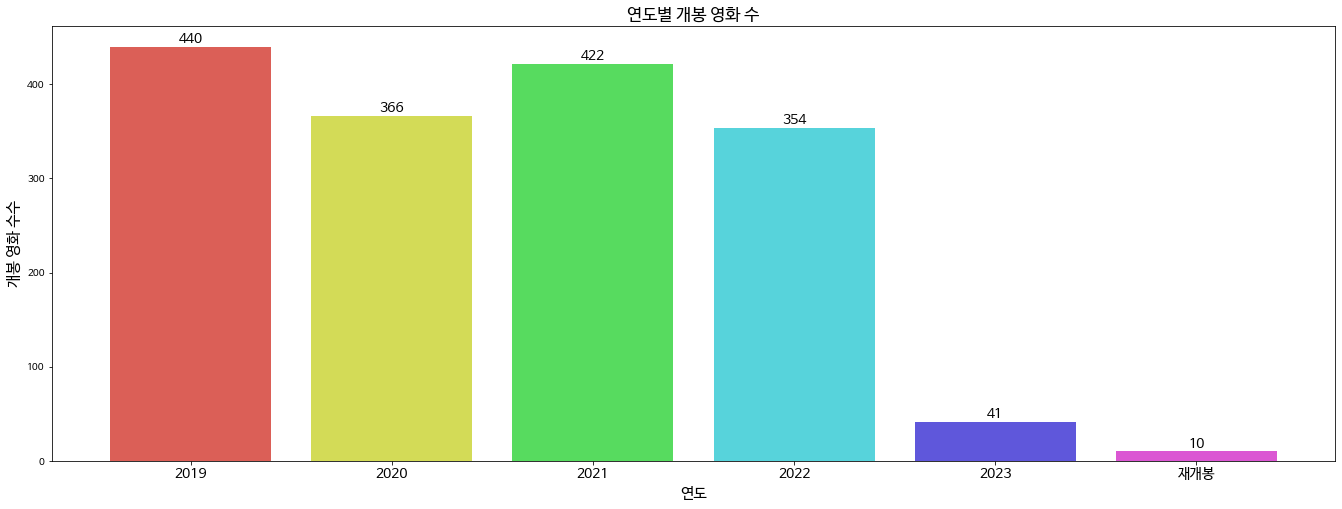

In [302]:
data["release_year"] = data["release_date"].apply(lambda x : x[:4])
cnt_df = data.groupby("release_year")["id"].count().reset_index()

col = []
cnt = 0

for i in range(len(cnt_df)):
    if cnt_df["id"].iloc[i] > 5:
        col.append([cnt_df["release_year"].iloc[i] ,cnt_df["id"].iloc[i] ]  )
    else:
        cnt += cnt_df["id"].iloc[i] 

col.append(["재개봉" ,cnt])
year_data = pd.DataFrame(col)

draw_bar( year_data[0] , year_data[1] , ["연도별 개봉 영화 수" , "연도","개봉 영화 수수"]    )


In [303]:
## copied from preprocessing file 
class Enc:

    def countVec( df , col ):
        str_connector = "|"
        all_cols = [ x.split(str_connector)[i] for x in df[col] for i in range(len(x.split(str_connector)))   ]
        uniq_col_lst = pd.unique( sorted( all_cols ) ) 

        # create dummy DF
        zero_metrix = np.zeros((len(df[col]), len(uniq_col_lst)))
        dummy = pd.DataFrame(zero_metrix, columns=uniq_col_lst)

        # count genres
        for i, gen in enumerate(df[col]):
            indices = dummy.columns.get_indexer(  gen.split(str_connector) )
            dummy.iloc[i, indices] = 1
        return dummy


## 연도 & 장르별 영화 개봉 수 (5개년)

### stacked bar

In [304]:
target_year = 2019
# genre + year df 생성
tmp_df = pd.concat( [data["release_year"], Enc.countVec(data,"genre")],axis = 1  )

# 형변환
tmp_df["release_year"] = pd.to_numeric(tmp_df["release_year"])

reopen_df = pd.DataFrame  (sum([ tmp_df.iloc[i]  for i in range(len(tmp_df)) if tmp_df["release_year"][i] < target_year ])).transpose()

year_genre_df = pd.concat( [ tmp_df.groupby("release_year")[tmp_df.columns].sum()  , reopen_df] ,axis = 0 ).transpose()

year_genre_df = year_genre_df.drop(columns = [i for i in year_genre_df.columns if (i < target_year and i > 0) ]  ).rename(columns = {0:"재개봉"}).iloc[1:]
year_genre_df

2019   2020   2021   2022  2023  재개봉
SF       30.0   19.0   21.0   14.0   2.0  0.0
가족       22.0   18.0    9.0   12.0   3.0  1.0
공연실황      4.0    7.0   11.0   23.0   2.0  0.0
공포       61.0   46.0   56.0   24.0   2.0  0.0
느와르       1.0    0.0    1.0    1.0   0.0  0.0
다큐멘터리    51.0   34.0   51.0   47.0   2.0  0.0
드라마     153.0  159.0  137.0  134.0  12.0  8.0
멜로/로맨스   33.0   23.0   25.0   27.0   1.0  6.0
모험       31.0   25.0   29.0   23.0   5.0  1.0
뮤지컬       5.0    9.0   11.0   13.0   2.0  1.0
미스터리     28.0   19.0   25.0   17.0   1.0  1.0
범죄       36.0   34.0   34.0   32.0   1.0  0.0
블랙코미디     1.0    0.0    0.0    0.0   1.0  0.0
서부        2.0    1.0    4.0    0.0   0.0  1.0
서스펜스      0.0    0.0    2.0    1.0   0.0  0.0
스릴러      78.0   61.0   81.0   61.0   4.0  1.0
애니메이션    34.0   16.0   23.0   22.0   9.0  0.0
액션       87.0   73.0   90.0   77.0   9.0  1.0
전쟁       11.0    7.0    3.0    6.0   0.0  1.0
정보없음      7.0    5.0   10.0    8.0   3.0  1.0
코미디      68.0   50.0   51.0   40.0   3.0  1.0
판타지      22.0   17.0   18.0   11.0   4.0  0.0

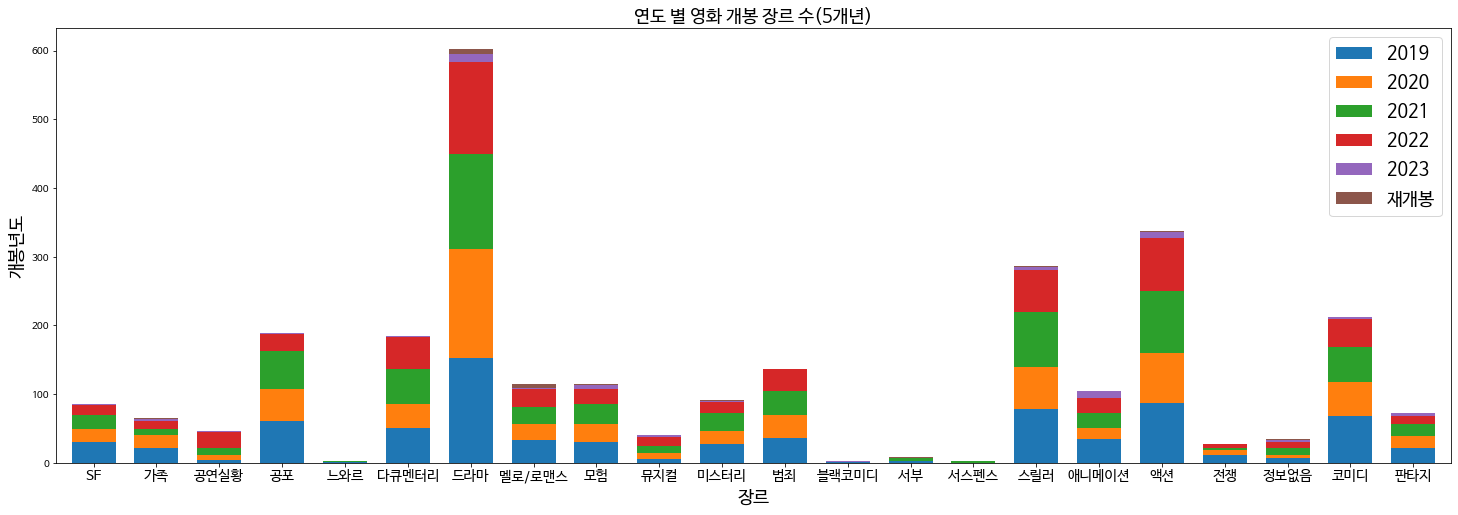

In [305]:
import matplotlib.pyplot as plt
label = tmp_df.columns.drop("release_year")
ind = np.arange(  len(label) )

font_size = 18
year_genre_df.plot.bar(stacked=True, legend='reverse' , figsize=(25,8) , width = 0.7)
plt.xticks(ind,  label ,fontsize=14 , rotation=0)

plt.legend(fontsize=font_size)
plt.title("연도 별 영화 개봉 장르 수(5개년)",fontsize=font_size)
plt.xlabel("장르",fontsize=font_size)
plt.ylabel("개봉년도",fontsize=font_size)
plt.show()



### none stacked bar

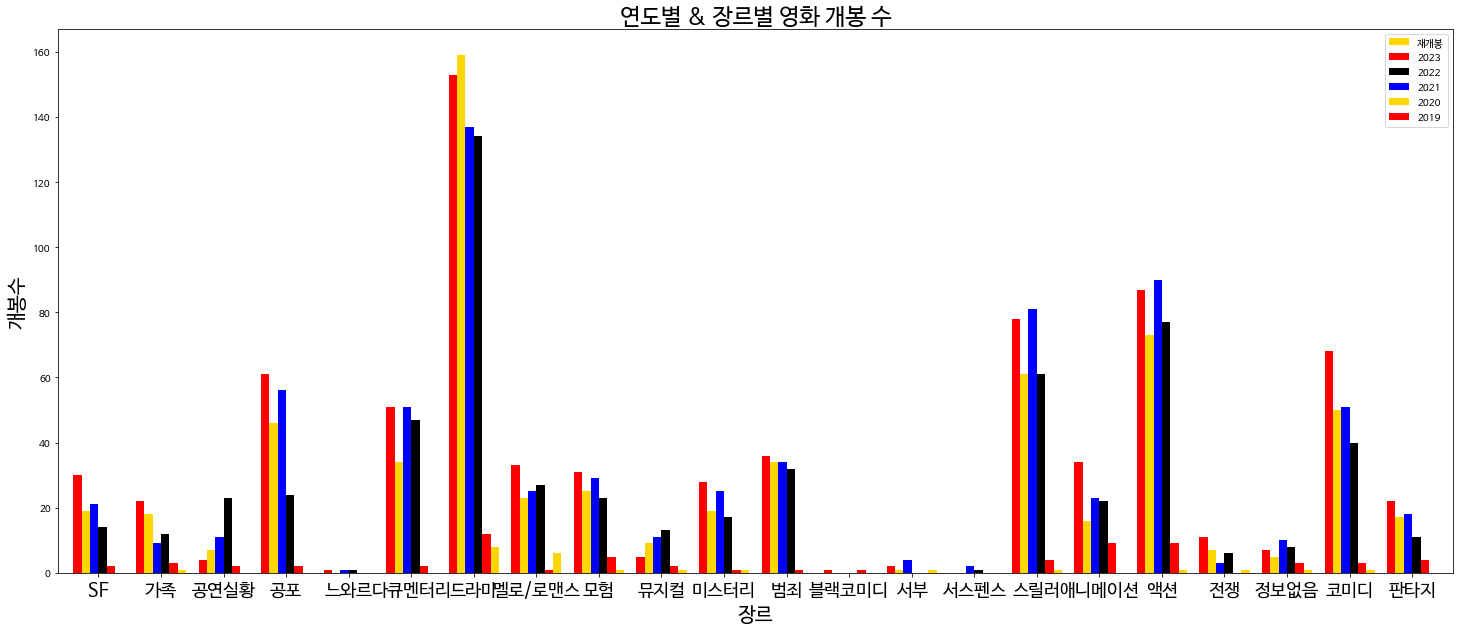

In [306]:
# 연도별 영화 개봉 장르 보기 - none stack 

draw_multi_bar( year_genre_df , label ,[ "연도별 & 장르별 영화 개봉 수" , "장르","개봉수"] )

## 연도별 & 장르별 시청자 수


In [309]:
tmp_year = pd.concat(   [  data["viewer"] , data["release_year"],Enc.countVec(data,"genre")   ] , axis = 1)
year_lst = ["2019","2020","2021","2022","2023"]

result = []
for year in year_lst :
    tmp = []  
    for i in new_label:
        tmp_year_df = tmp_year.groupby(["release_year",i])["viewer"].sum()
        
        if len(tmp_year_df[year]) == 2:
            tmp.append(tmp_year_df[year][1])
        else:
            tmp.append(0)
    result.append(tmp)


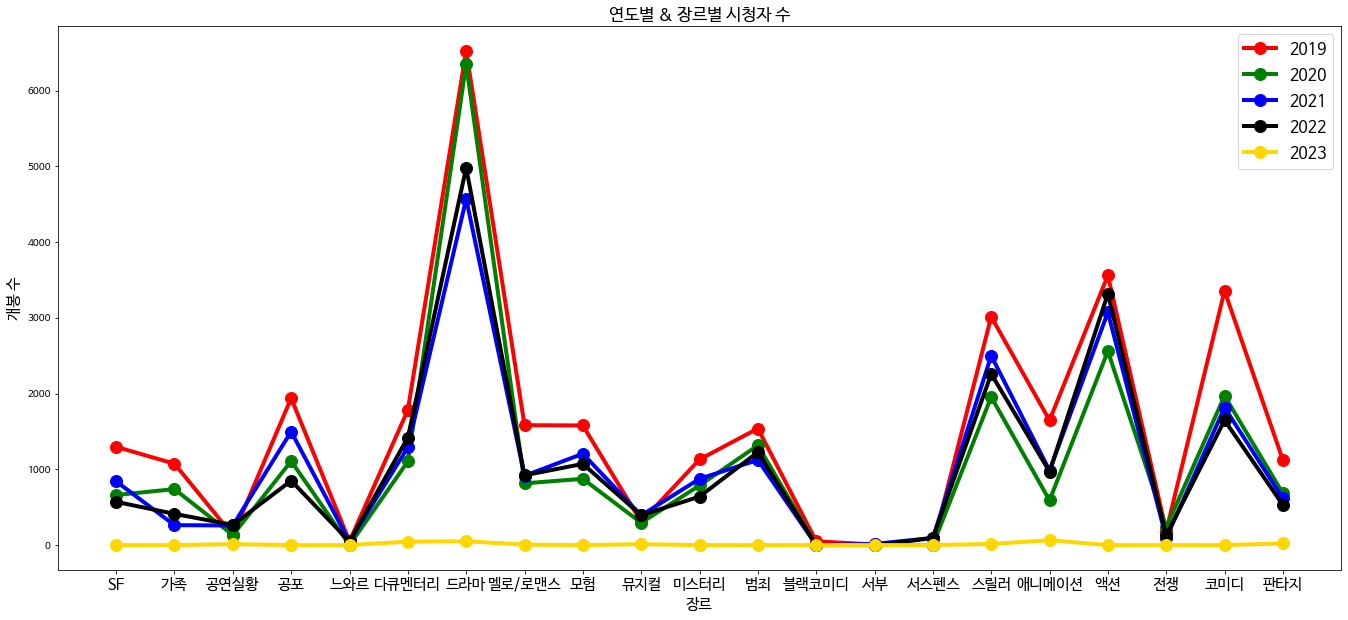

In [310]:
year_genre_table = pd.DataFrame(result)
year_genre_table.columns = new_label
year_genre_table.index = year_lst
year_genre_table = year_genre_table.transpose()

fig = plt.figure(figsize=(23,10)) 
color = ['red','green','blue',"black","gold"]

for i in range(len(year_lst)):
    plt.plot( new_label, year_lst[i], data=year_genre_table, marker='o', markerfacecolor=color[i], markersize=12, color=color[i], linewidth=4)

# # show legend
plt.legend(fontsize = 16)
plt.xticks(new_label, size =15)
plt.title("연도별 & 장르별 시청자 수", size =17)
plt.xlabel("장르", size =15)
plt.ylabel("개봉 수", size =15)

plt.show()

# 장르


## 한 해동안 장르별 영화 개봉 수 (재개봉~2023)

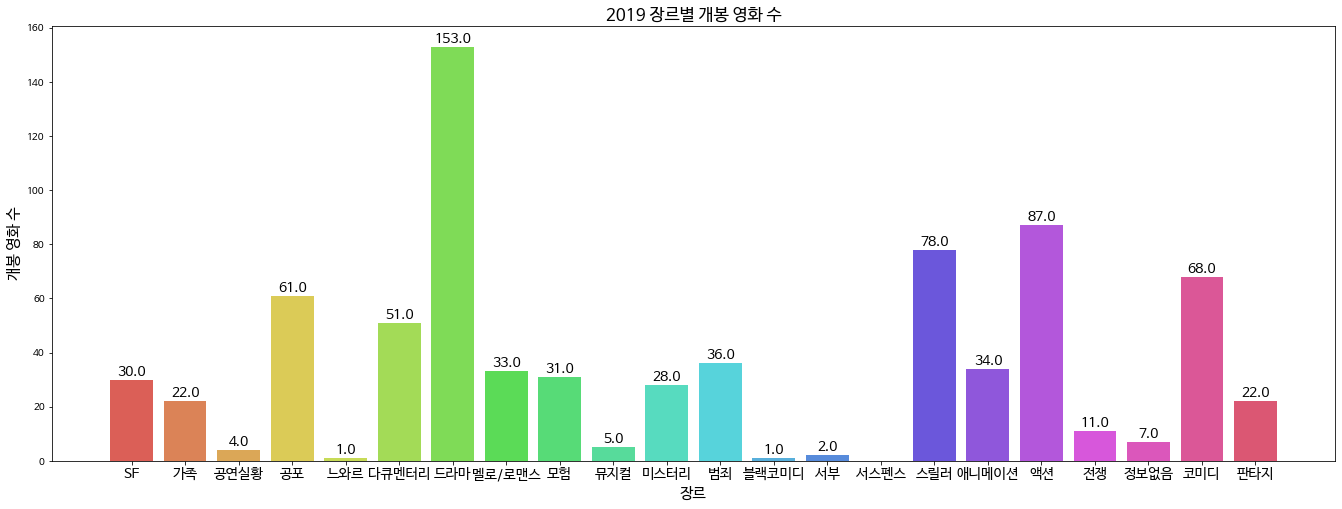

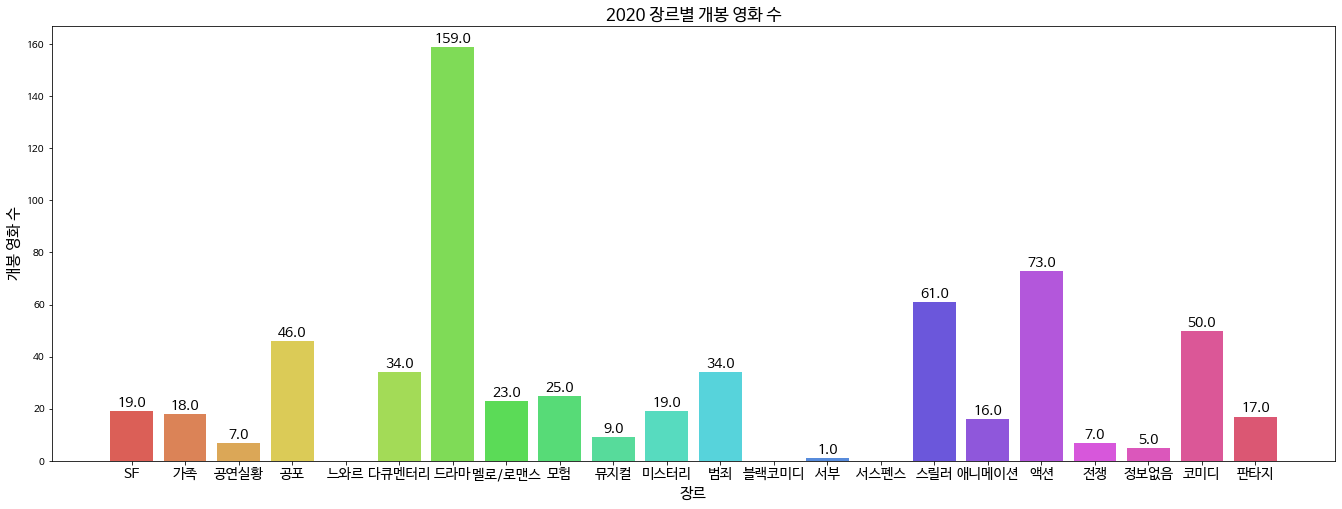

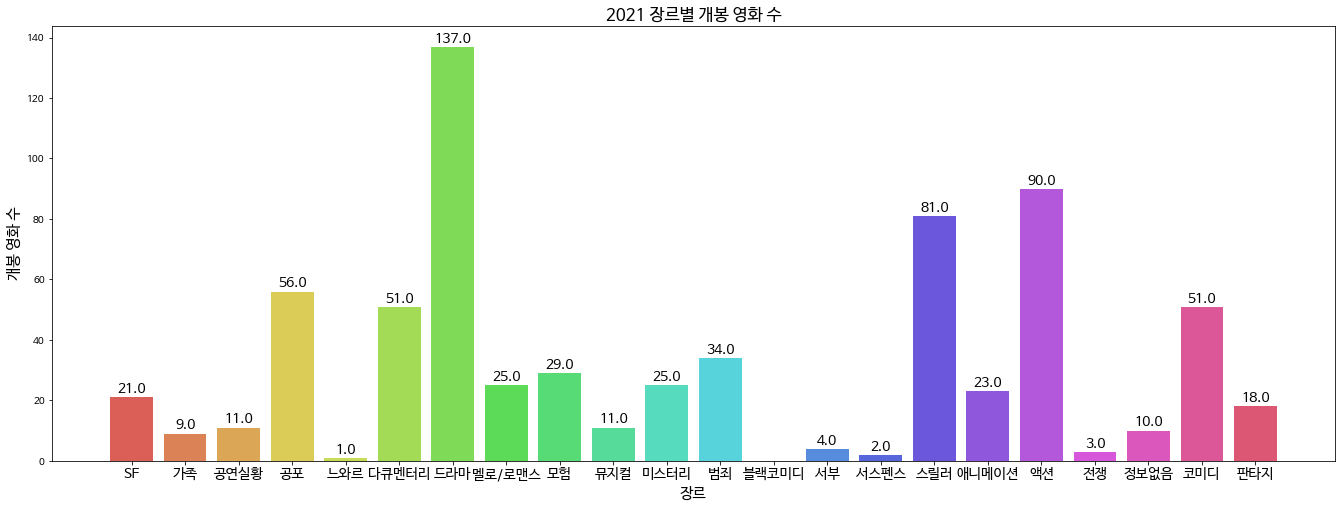

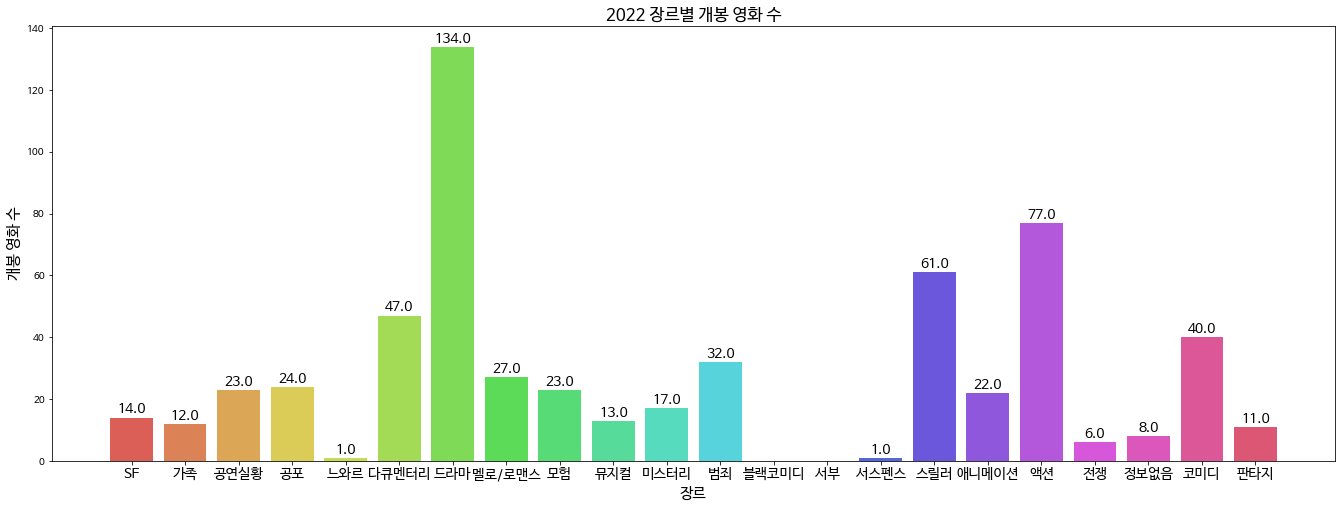

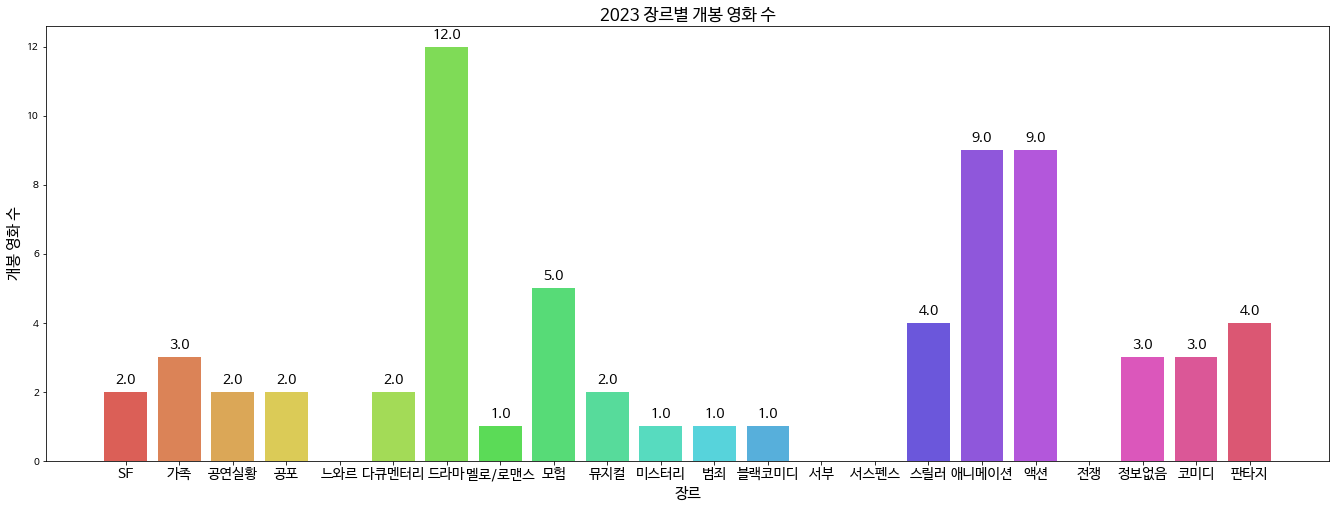

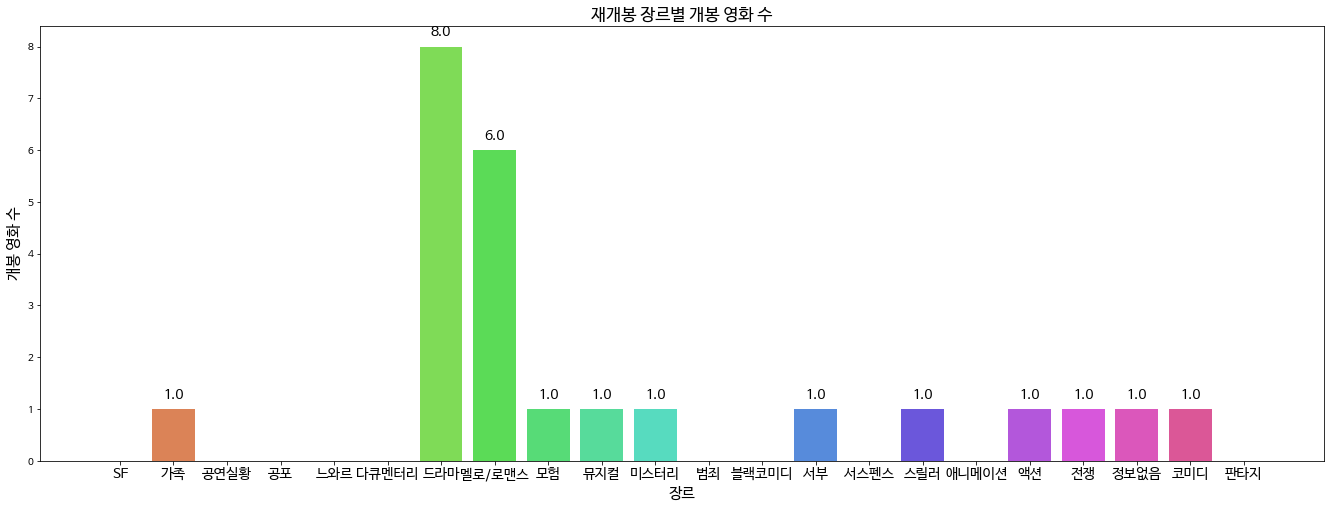

In [322]:
# 연도별 영화 개봉 장르

year_lst = [2019,2020,2021,2022,2023,"재개봉"]

for i in year_lst:
    draw_bar( label , year_genre_df[i] , [f'{i} 장르별 개봉 영화 수' , "장르","개봉 영화 수"]    )
    print()


## 장르별 평균 평점


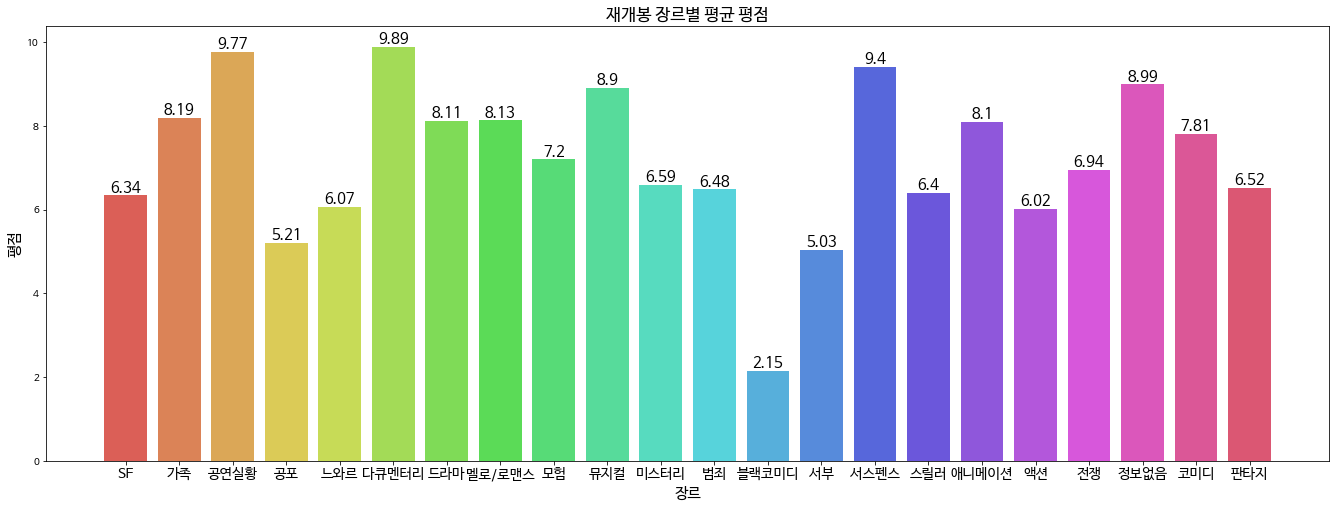

In [313]:
label = Enc.countVec(data,"genre").columns 

# 영화 한개당 점수 + 장르 
tmp_df = pd.concat( [data["avg_grade"], Enc.countVec(data,"genre")],axis = 1  )
lst = [ round((((tmp_df.groupby(i)["avg_grade"].sum())[1.0]) / (tmp_df.groupby(i)["avg_grade"].count()))[1.0],2)  for i in label    ]

draw_bar( label , lst , [f'{i} 장르별 평균 평점' , "장르","평점"]    )

## >>>>>>장르별 시청자 수 

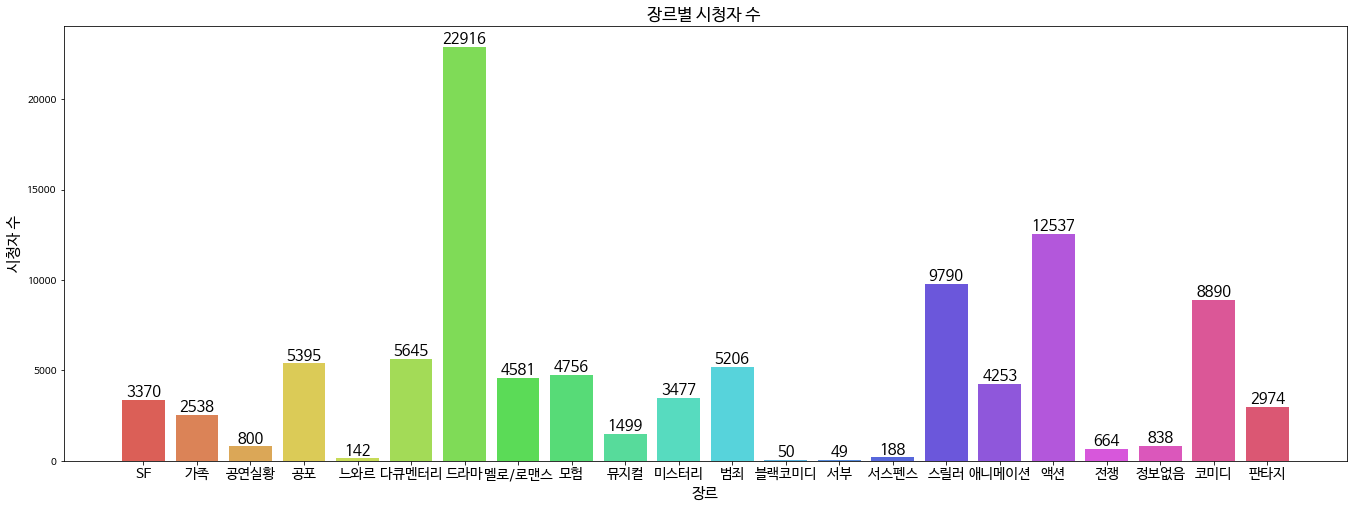

In [314]:
# 장르별로 viewer수 ---- > 근데 이걸 년도별로 하고싶은거잖아,,,? THINK! 

tmp_df = pd.concat( [data["viewer"], Enc.countVec(data,"genre")],axis = 1  )
lst = [ ((tmp_df.groupby(i)["viewer"].sum())[1.0]) for i in label    ]

draw_bar( label , lst , ['장르별 시청자 수 ' , "장르","시청자 수"]    )

## 장르 & 개봉상태(status)별 개봉 영화 수 


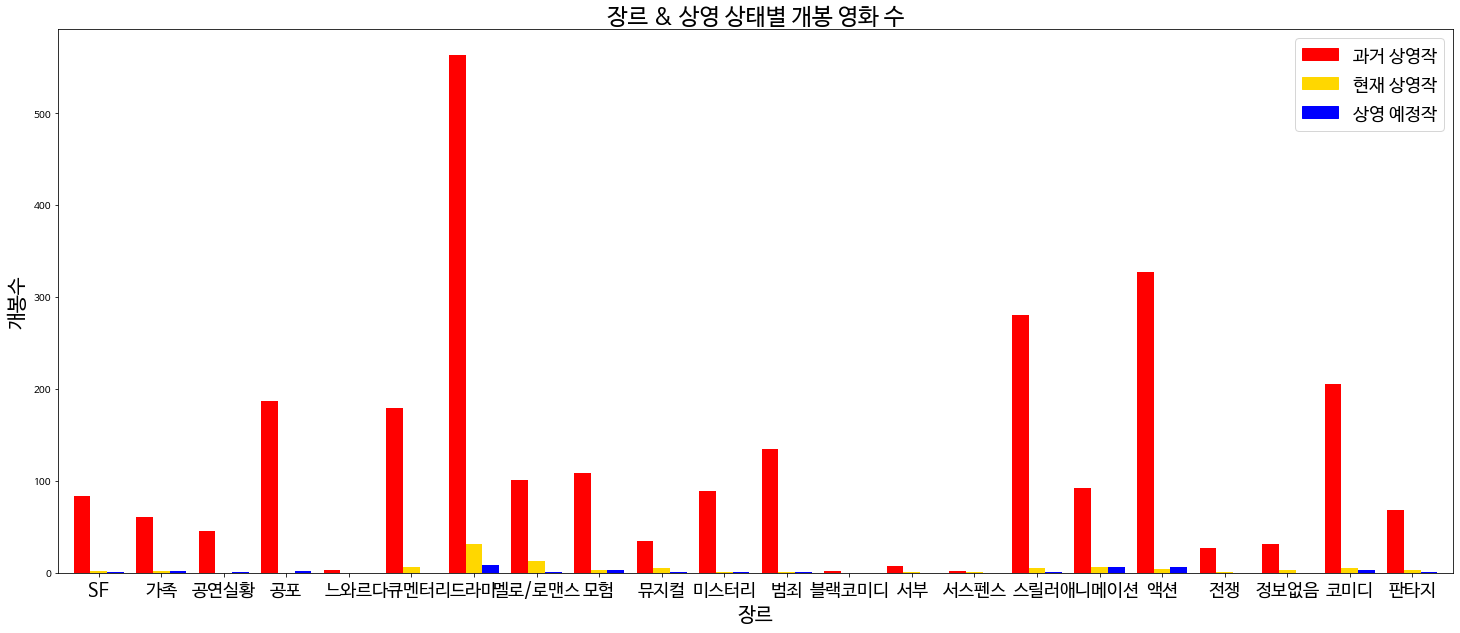

In [315]:
# genre + year df 생성
genre_stat_data = pd.concat( [data["status"], Enc.countVec(data,"genre")],axis = 1  )
genre_stat_df = genre_stat_data.groupby("status")[genre_stat_data.columns.drop("status")].sum().reset_index().drop(columns = "status").transpose()

status = ["과거 상영작","현재 상영작","상영 예정작"] 
draw_multi_bar( genre_stat_df , label ,[ "장르 & 상영 상태별 개봉 영화 수" , "장르","개봉수"],status )


## 상영 상태 별 장르 분포 

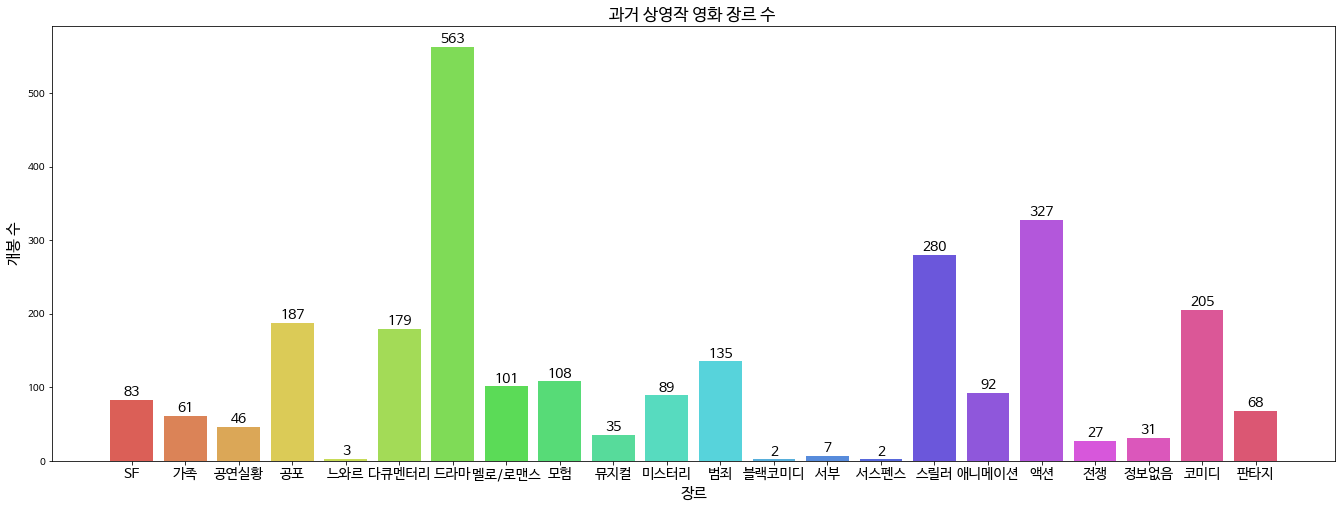

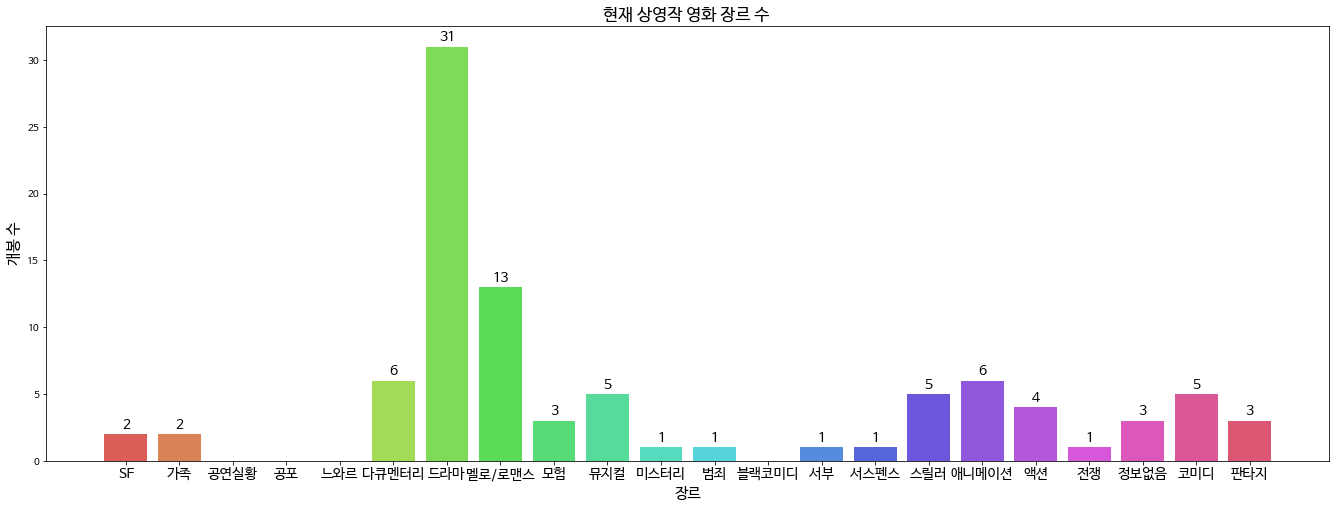

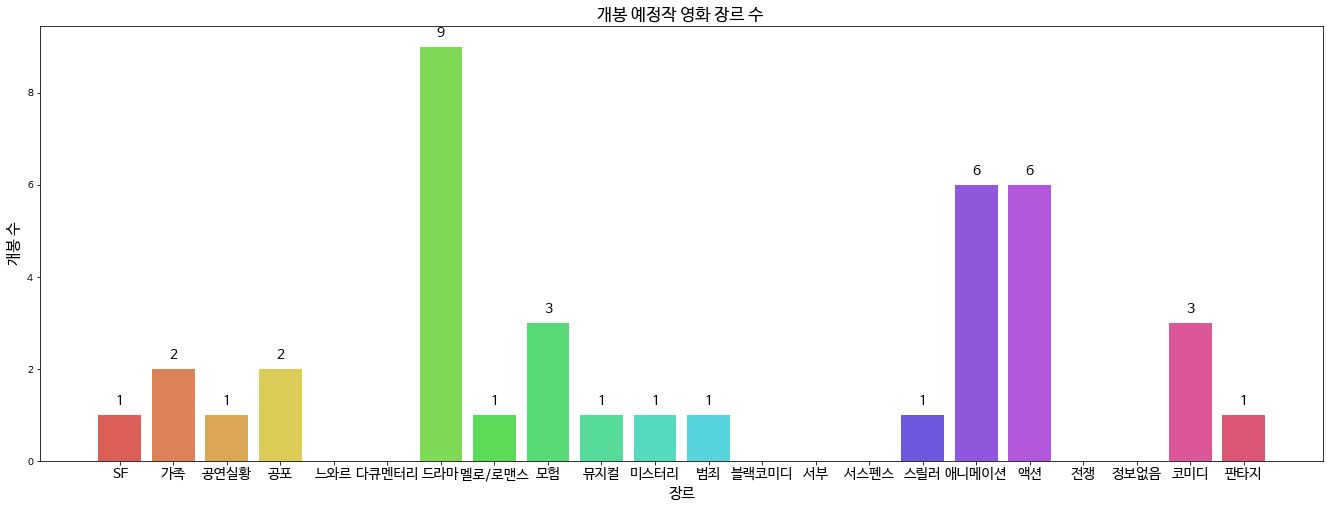

In [316]:
# genre + year df 생성
genre_stat_data = pd.concat( [data["status"], Enc.countVec(data,"genre")],axis = 1  )
genre_stat_df = genre_stat_data.groupby("status")[genre_stat_data.columns.drop("status")].sum().reset_index().drop(columns = "status")

fontsize=15

status =  ["과거 상영작","현재 상영작","개봉 예정작"]
colors = sns.color_palette('hls',len(label)) 

for i in range(len(status)):
    draw_bar( label , genre_stat_df.loc[i].apply(lambda x: int(x)) , [f'{status[i]} 영화 장르 수 ' , "장르","개봉 수"]    )
    print()


## 영화 장르 별 관람등급 분포

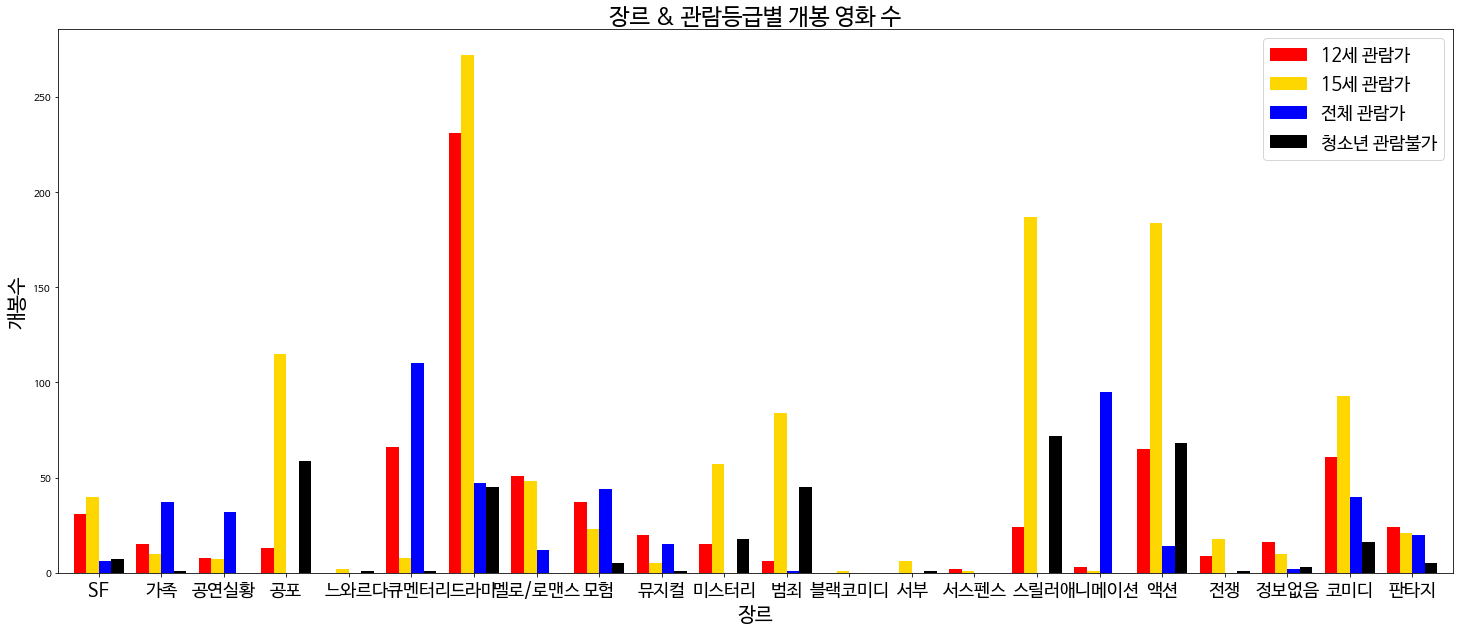

In [317]:
genre_rating_data = pd.concat( [data["ratings"], Enc.countVec(data,"genre")],axis = 1  )
tmp_genre = genre_rating_data.groupby("ratings").sum().transpose()

rating_lst = ["12세 관람가",	"15세 관람가",	"전체 관람가",	"청소년 관람불가"]
draw_multi_bar( tmp_genre.drop("정보없음",axis = 1) , label , ["장르 & 관람등급별 개봉 영화 수","장르","개봉수"] ,rating_lst )


## 장르 별 연관 장르 작품 수 


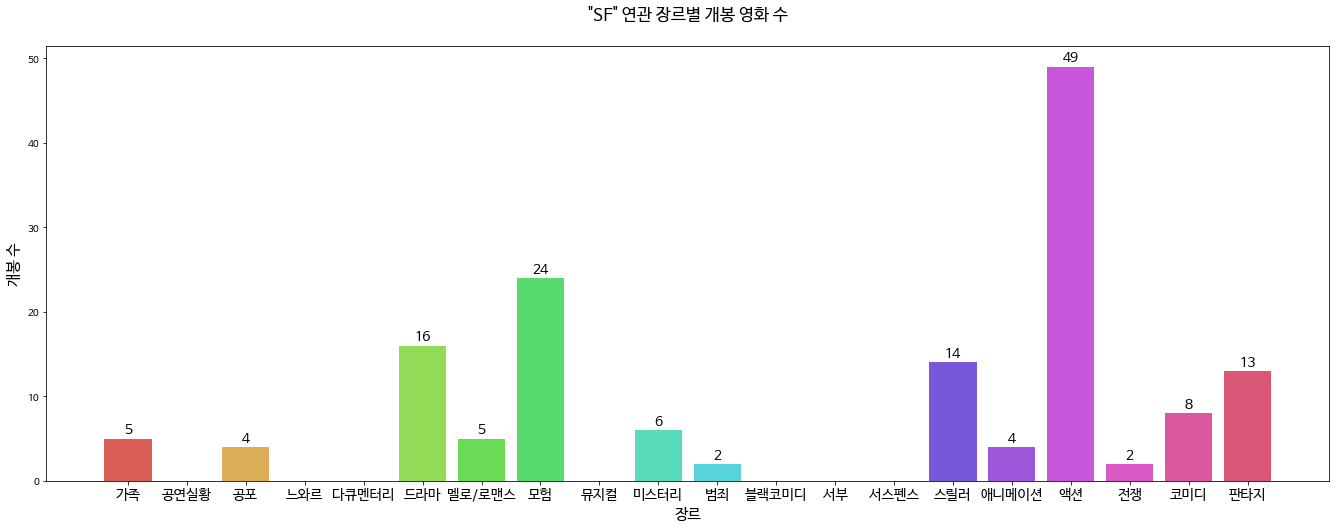

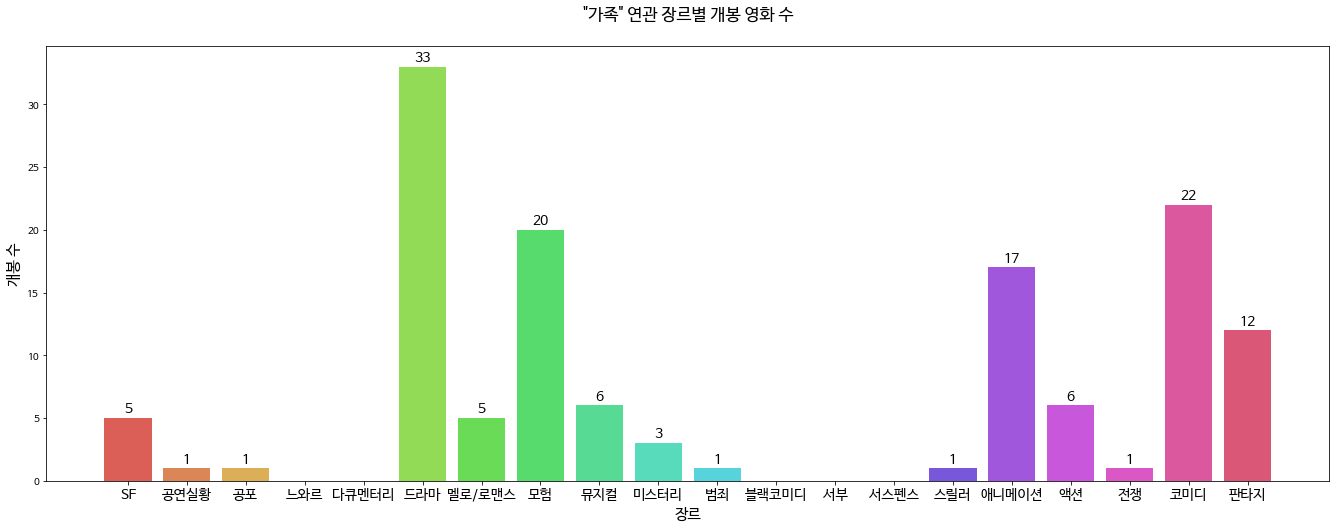

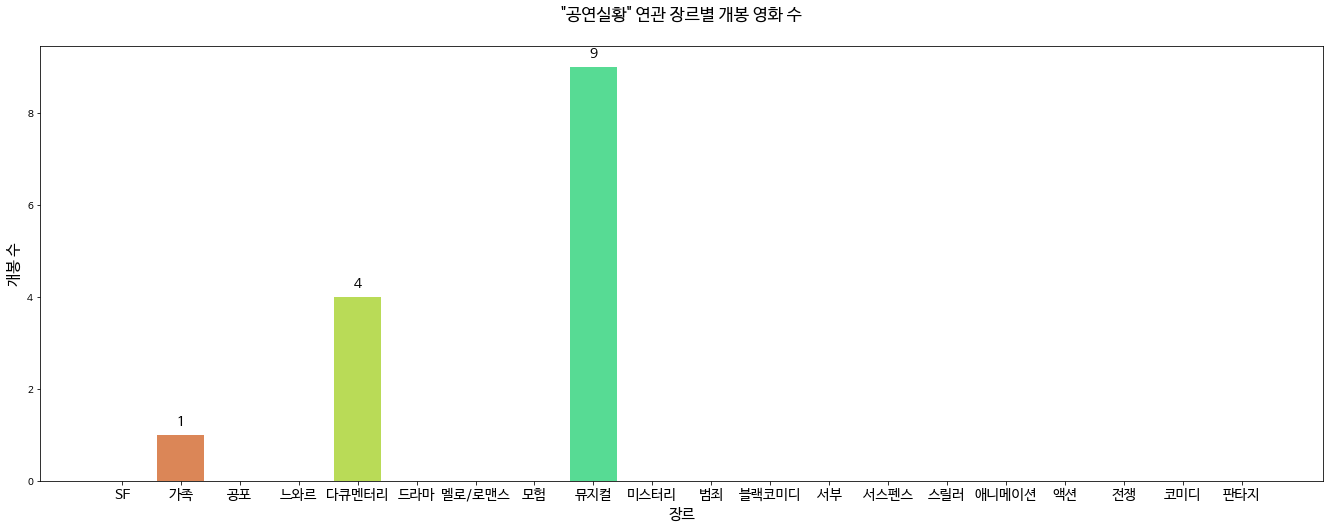

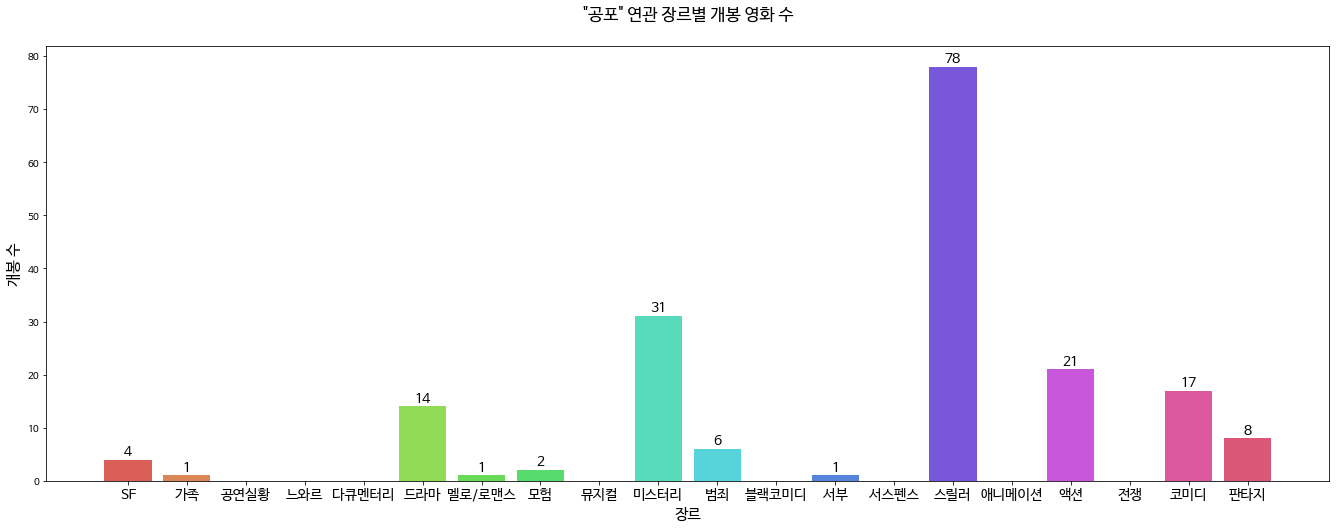

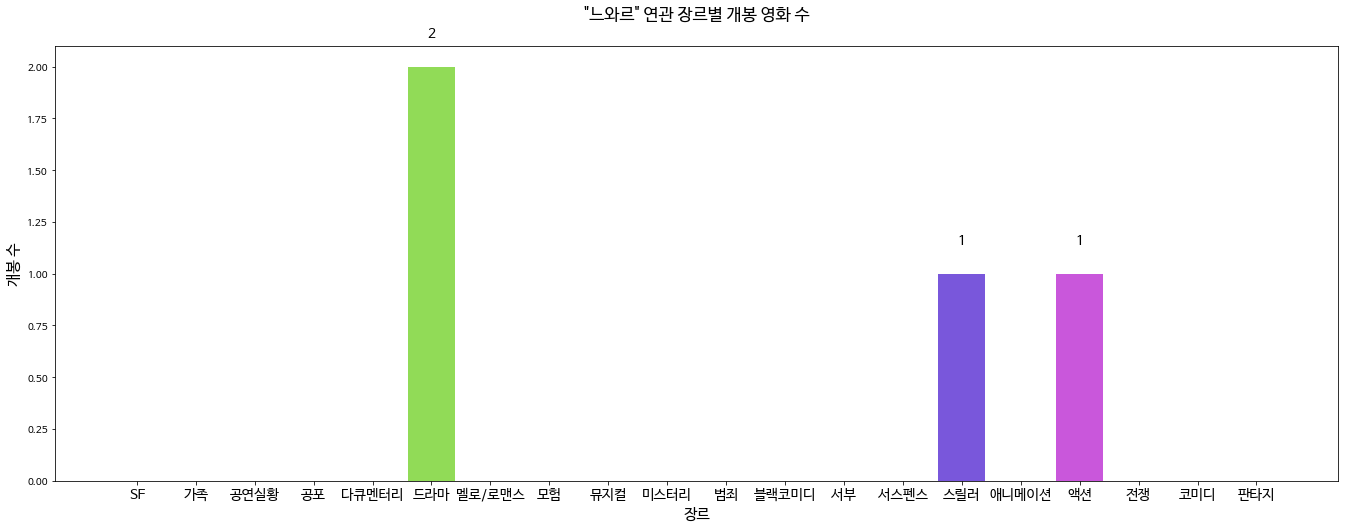

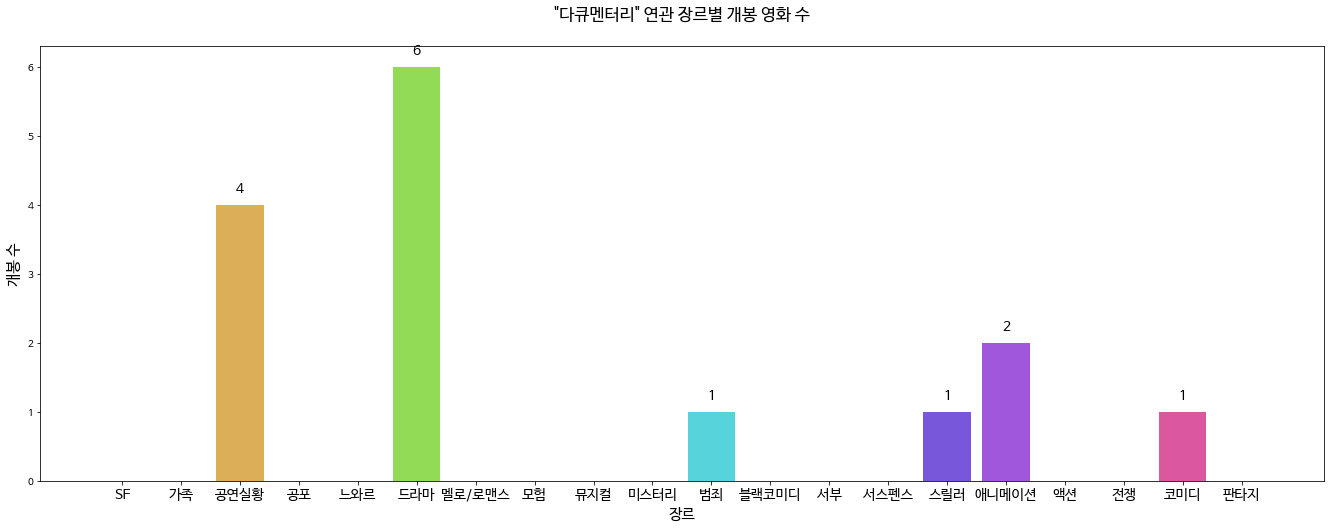

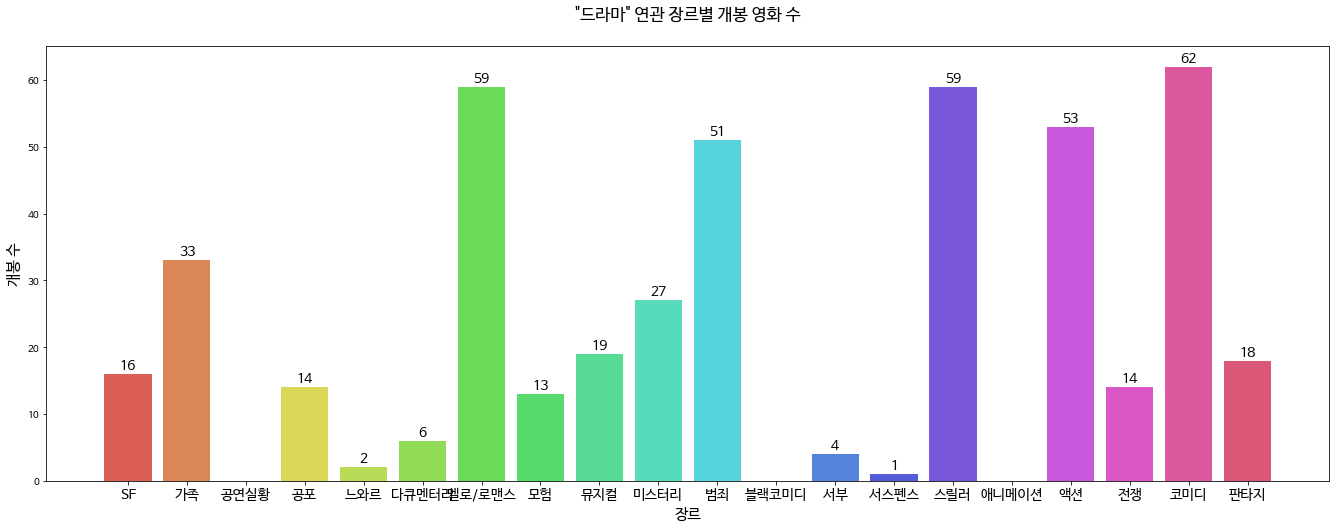

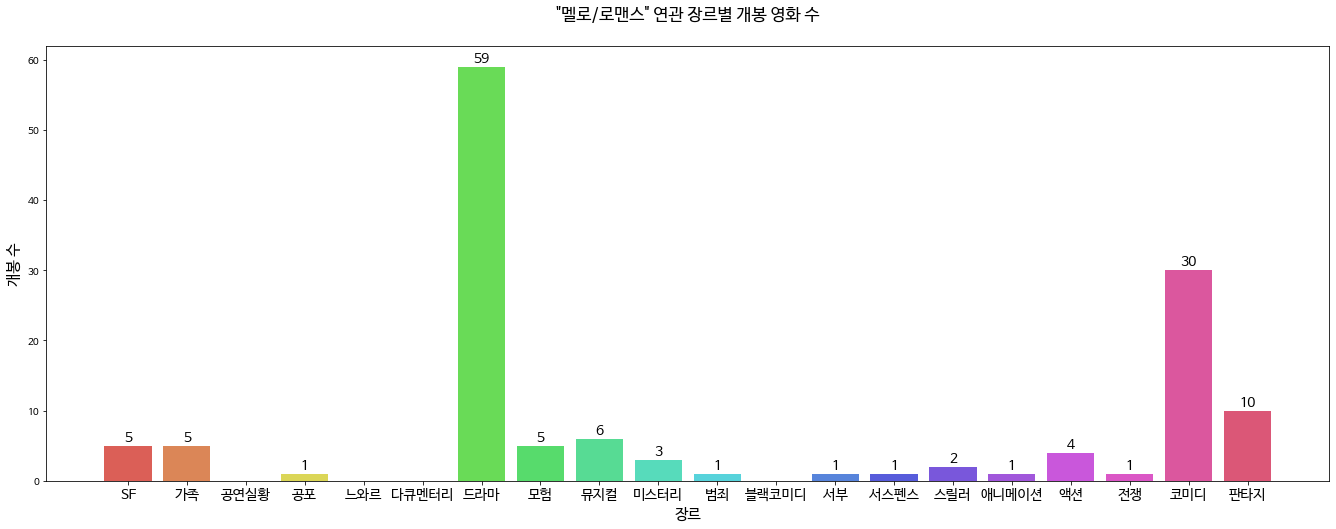

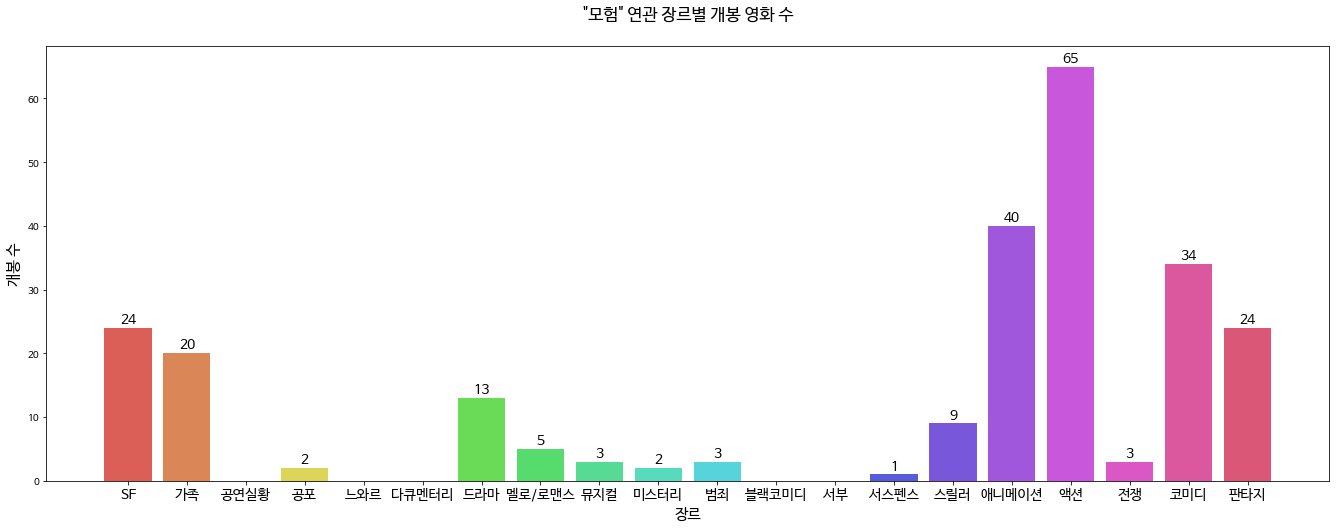

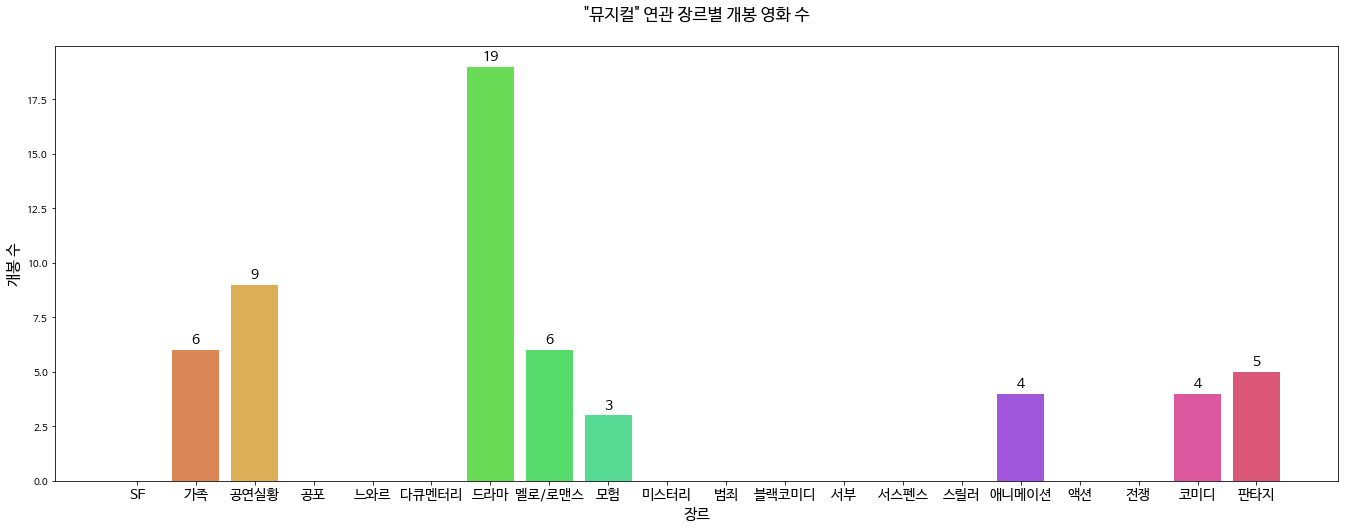

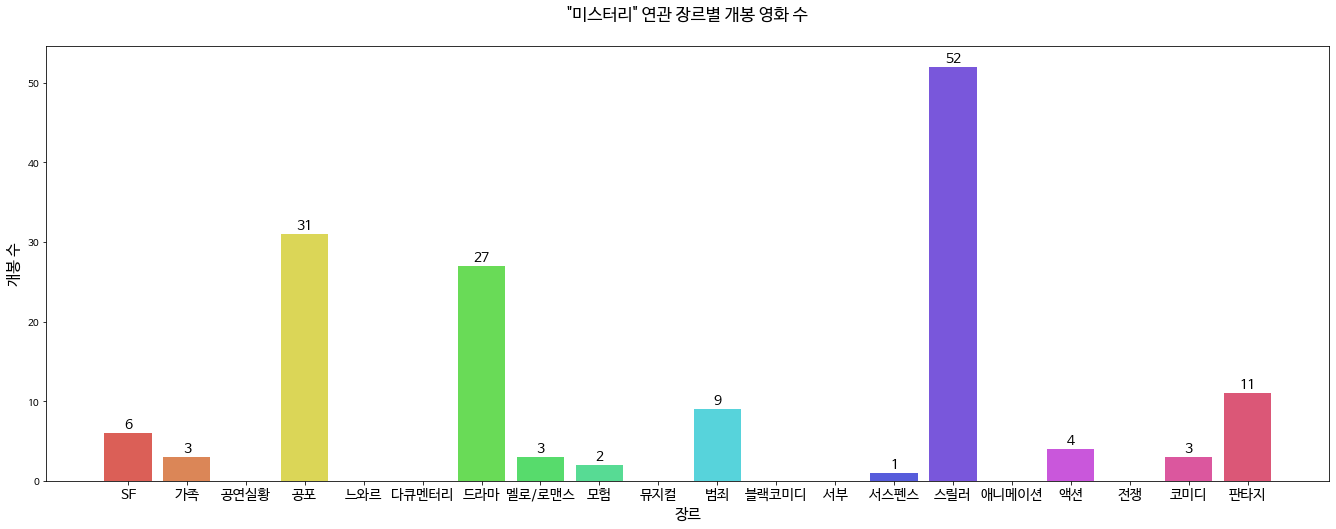

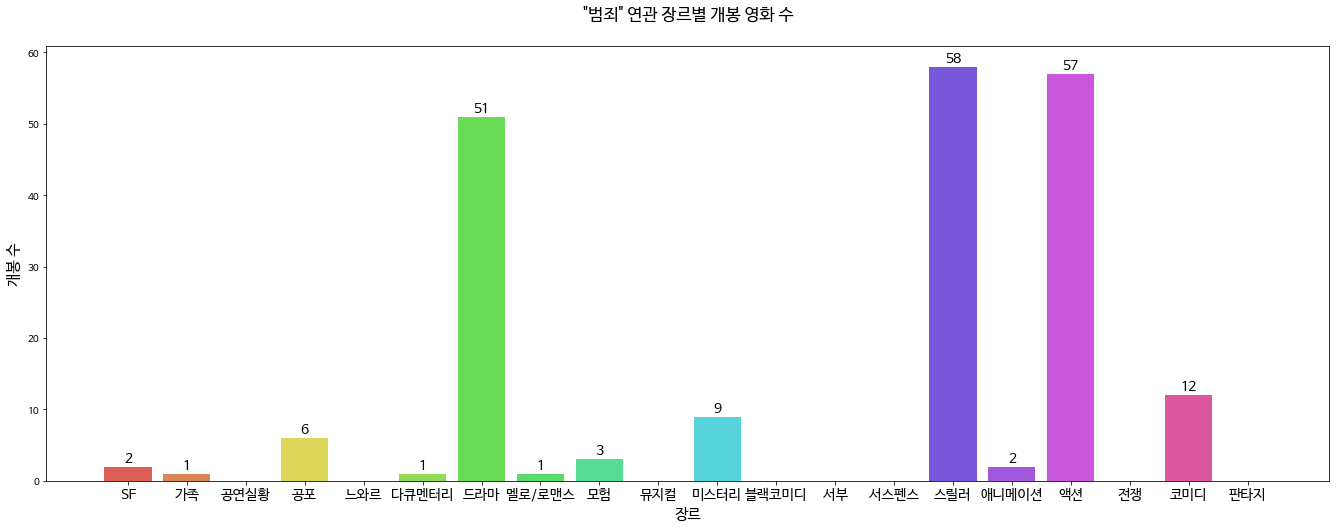

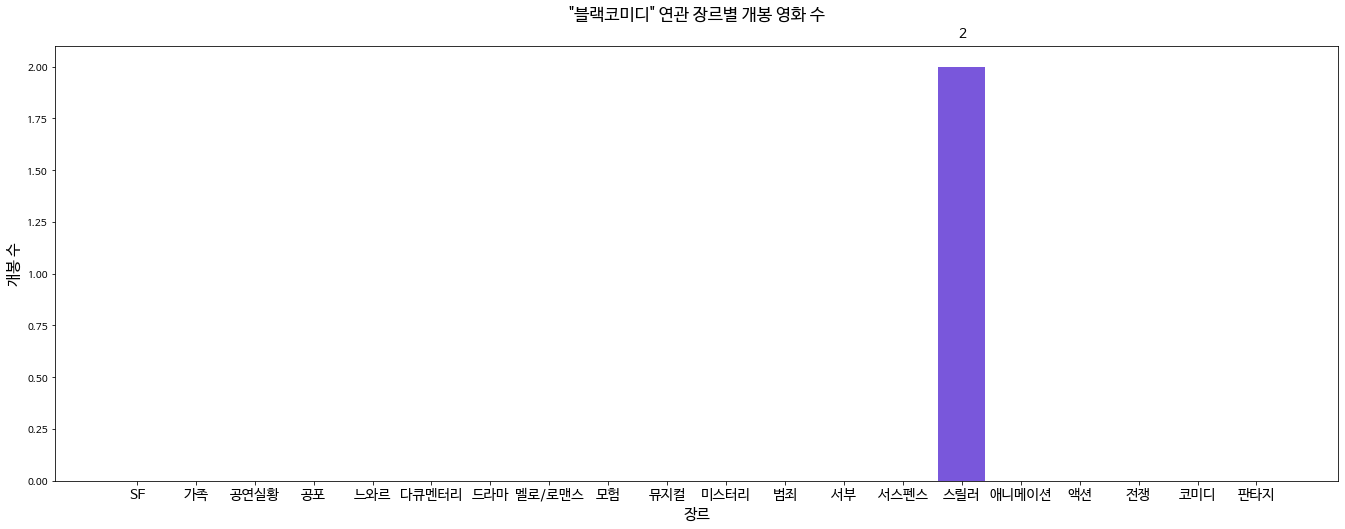

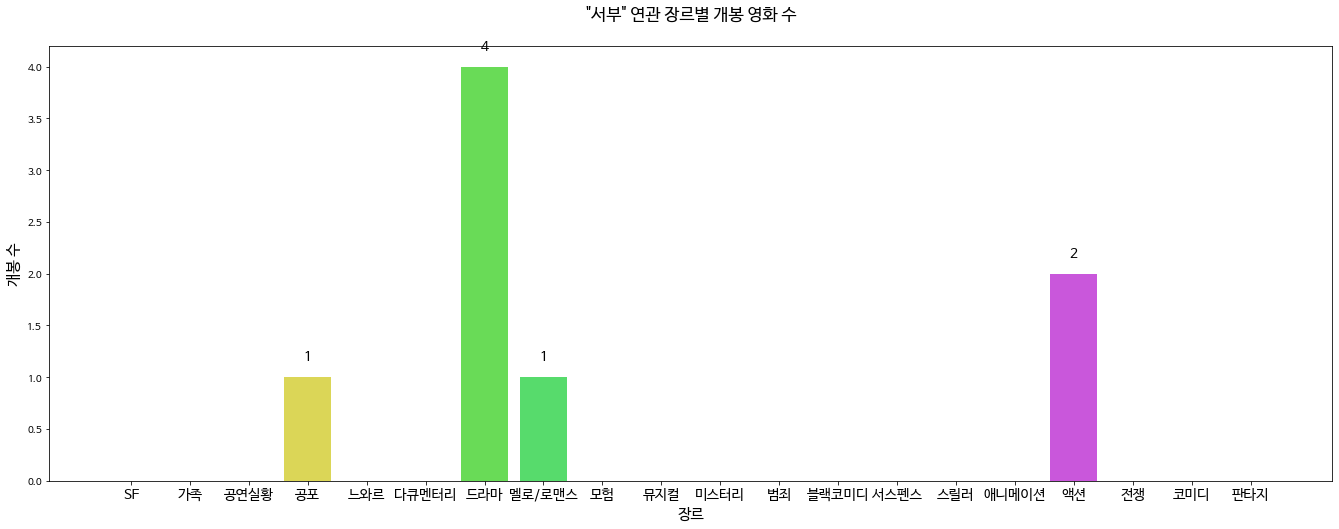

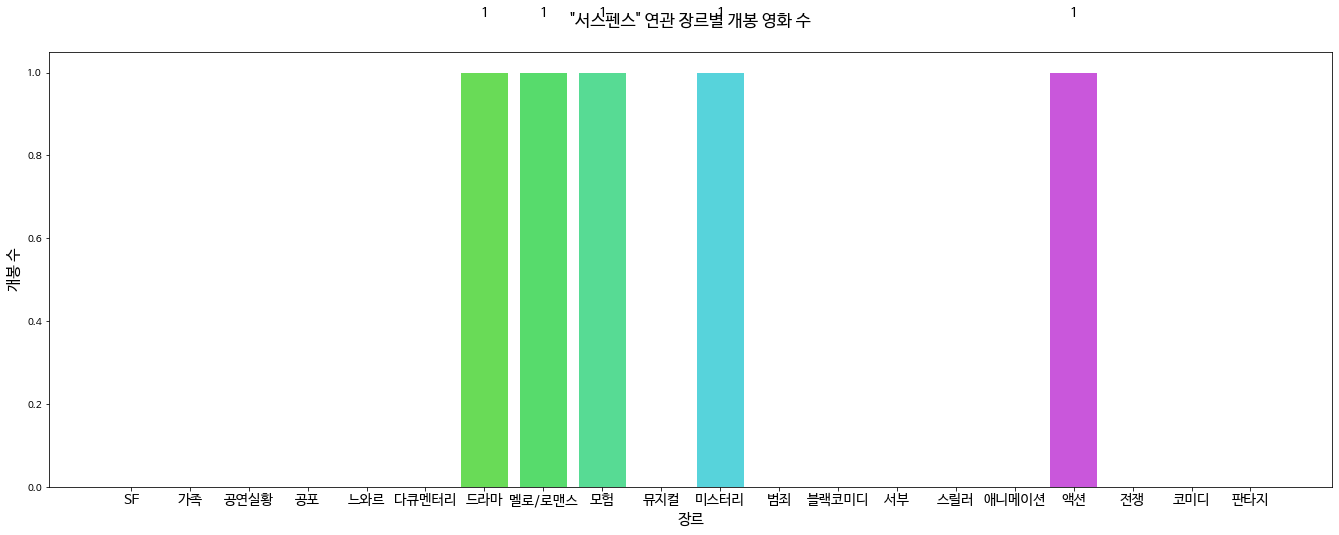

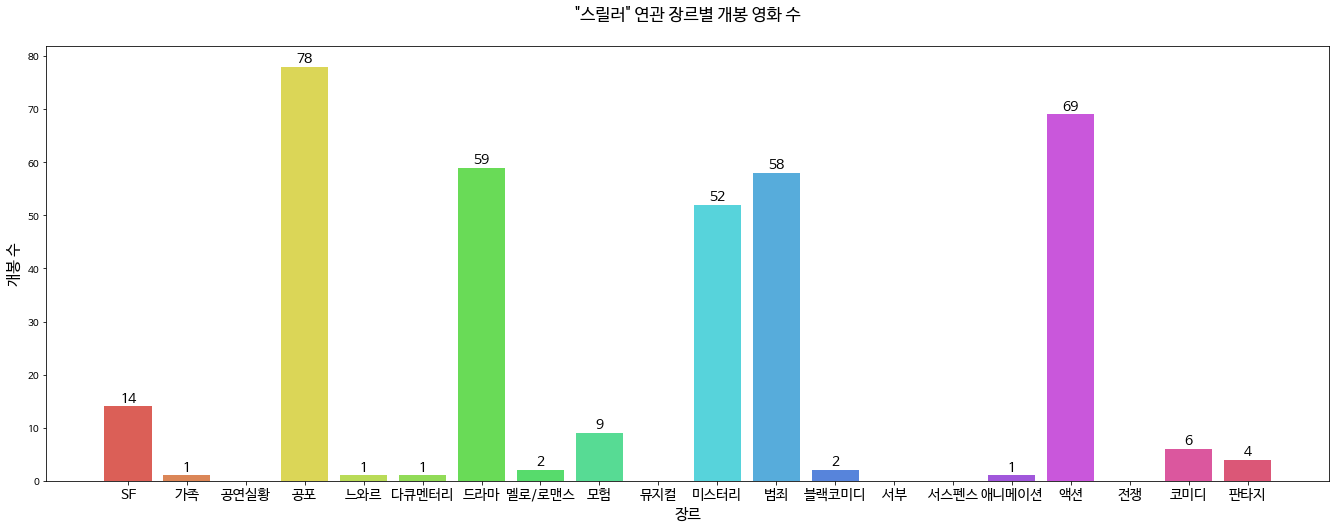

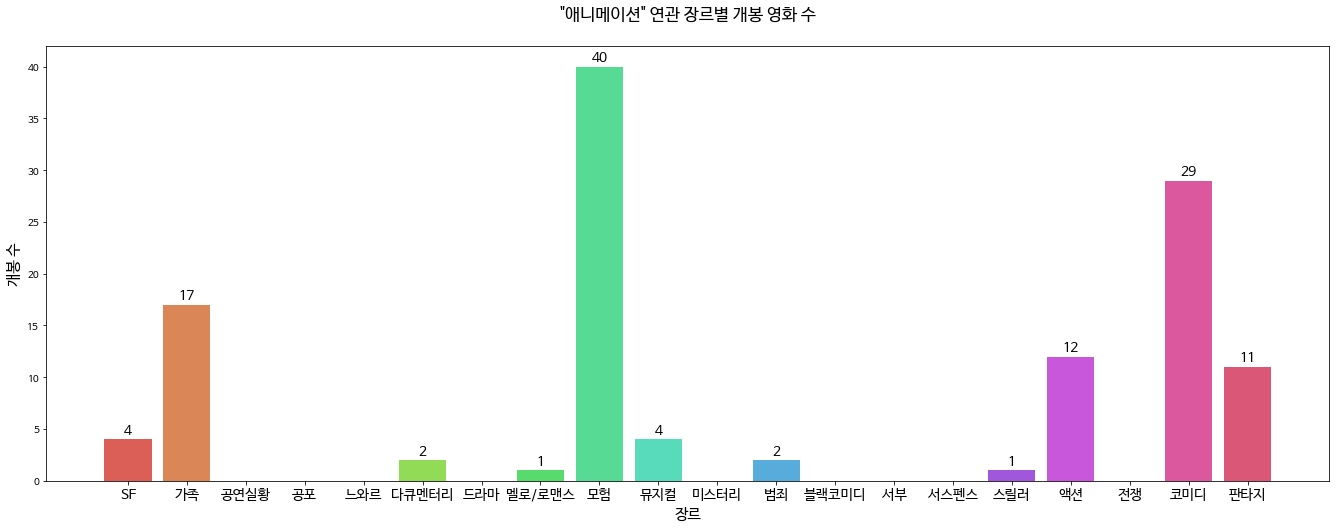

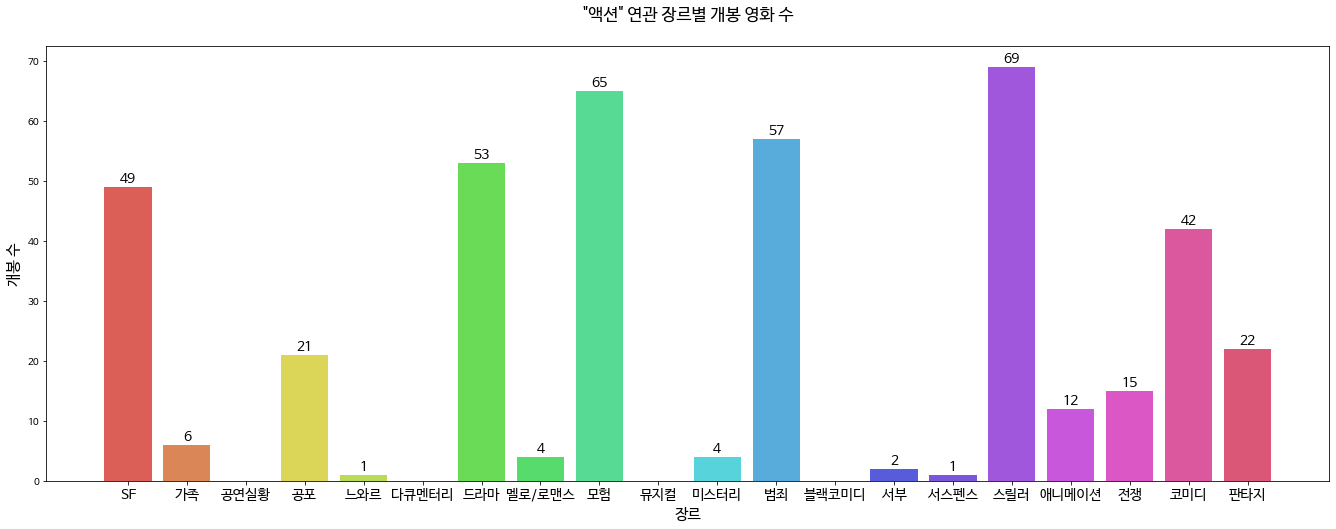

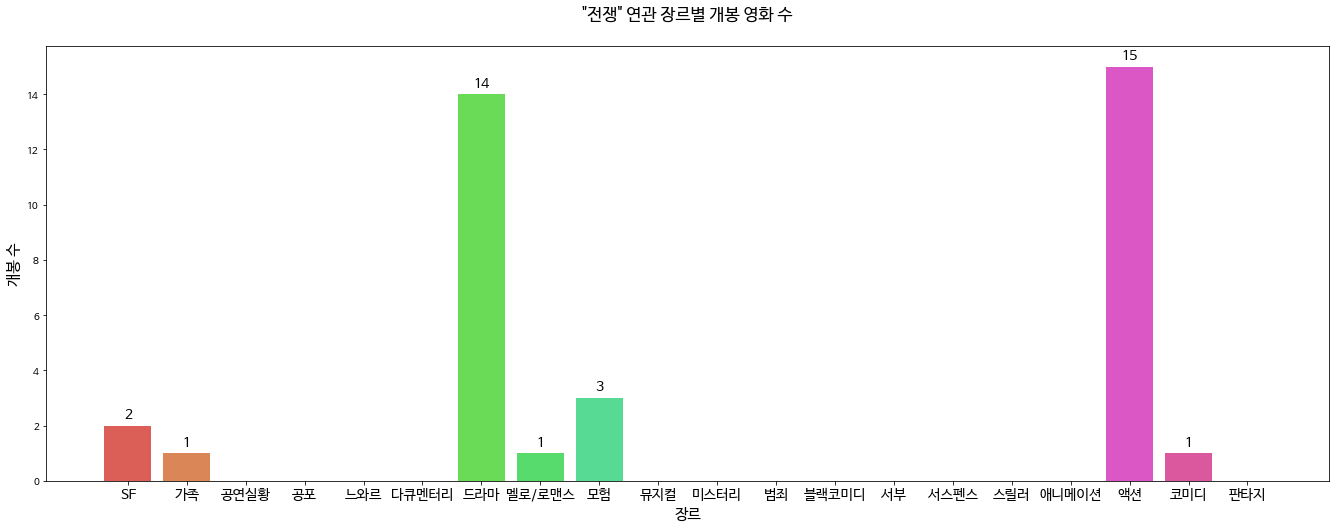

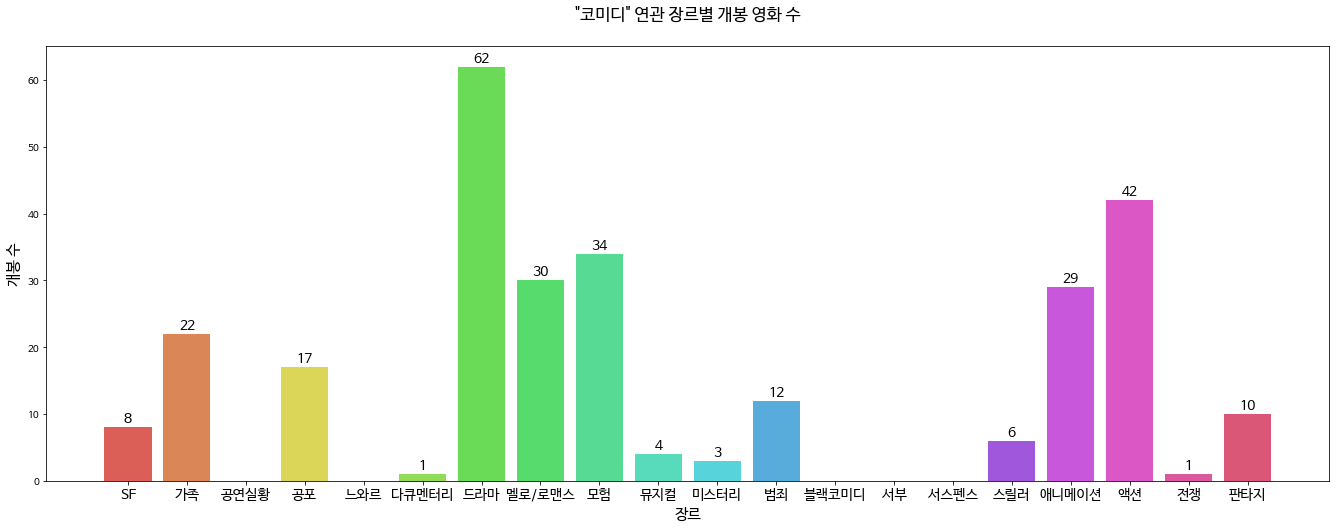

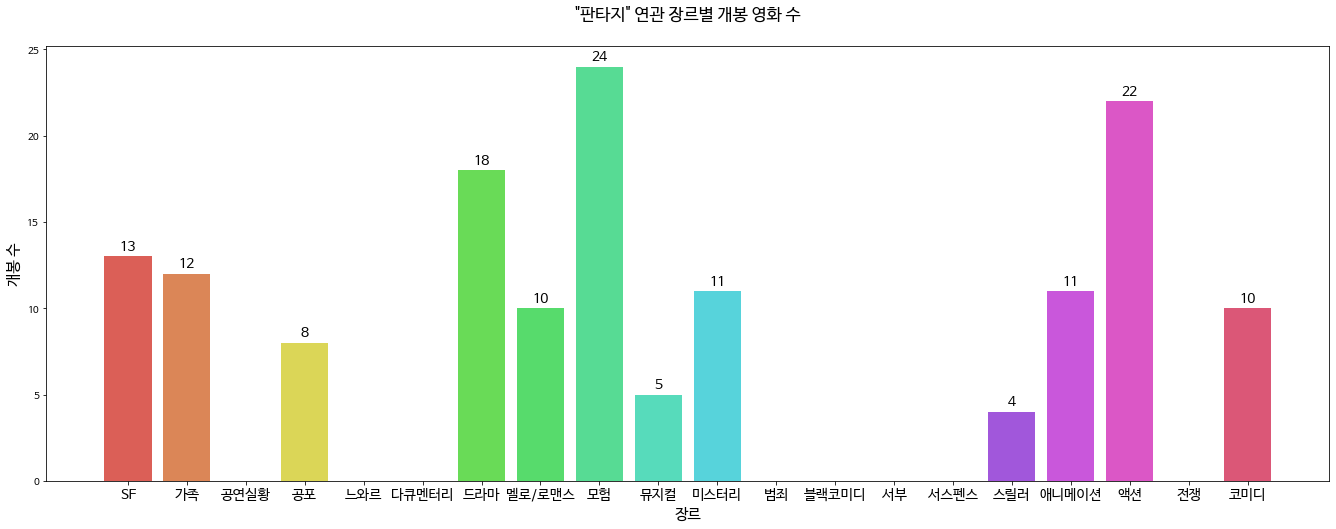

In [318]:
new_label = label.drop("정보없음")

for i in range(len(new_label)):
    # label[i]와 함께 한 장르 & 작품 수 
    genre_df = Enc.countVec(data,"genre").groupby(new_label[i]).sum().iloc[1]
    draw_bar( new_label.drop(new_label[i]) , genre_df.drop("정보없음").apply(lambda x : int(x)) , [f'"{new_label[i]}" 연관 장르별 개봉 영화 수\n' , "장르","개봉 수"]    )
    print()

## 장르별 많이 나온 키워드 워드클라우드



<ipython-input-325-b983de413cd5>:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



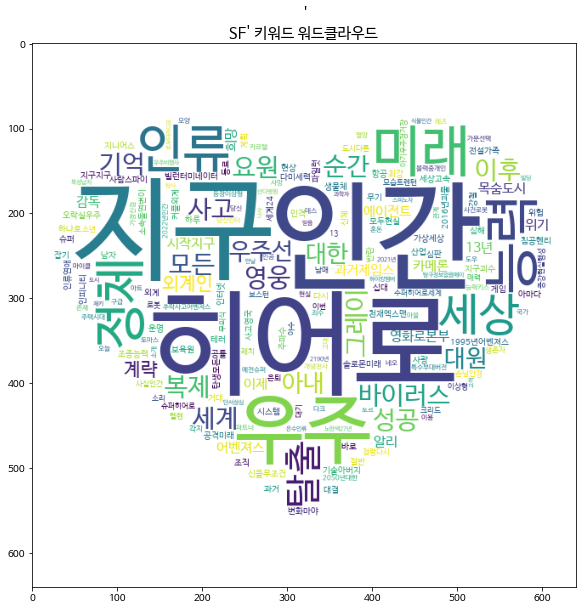

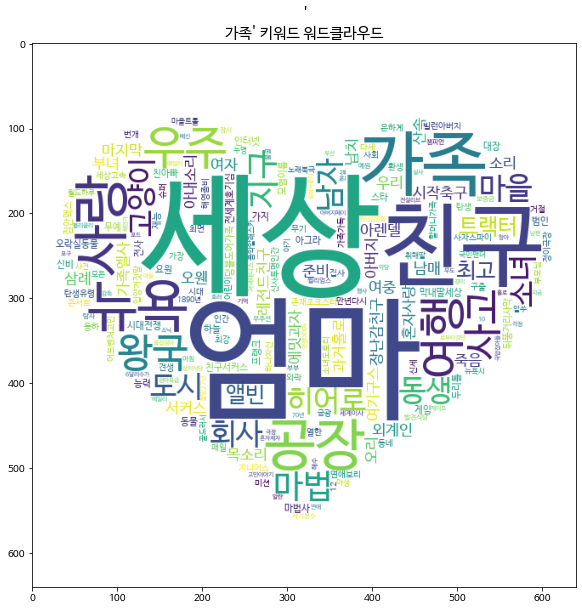

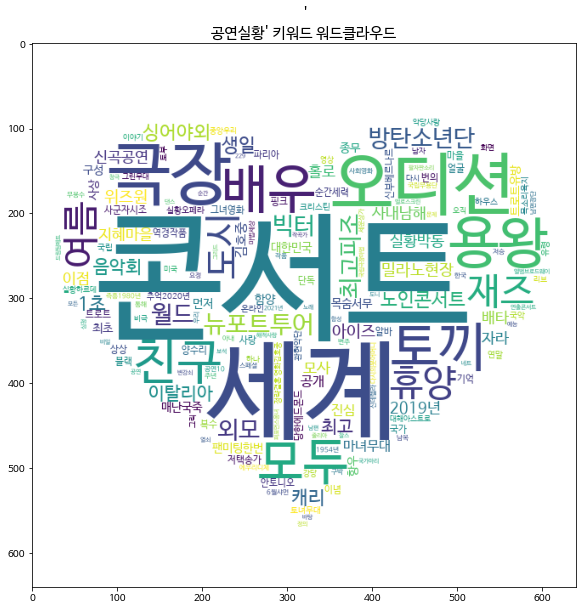

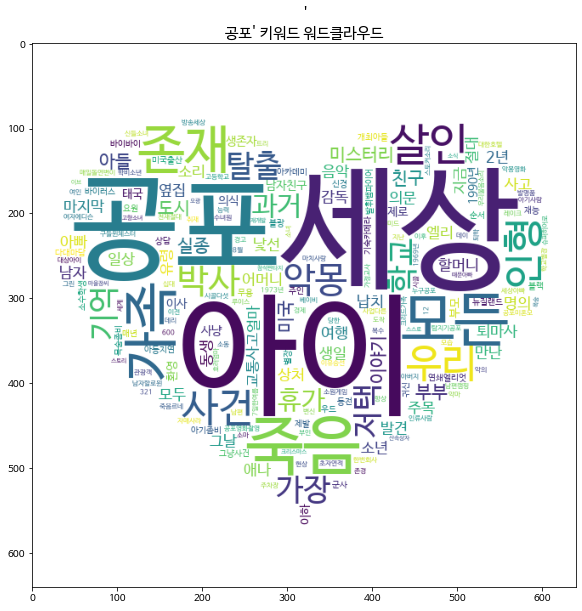

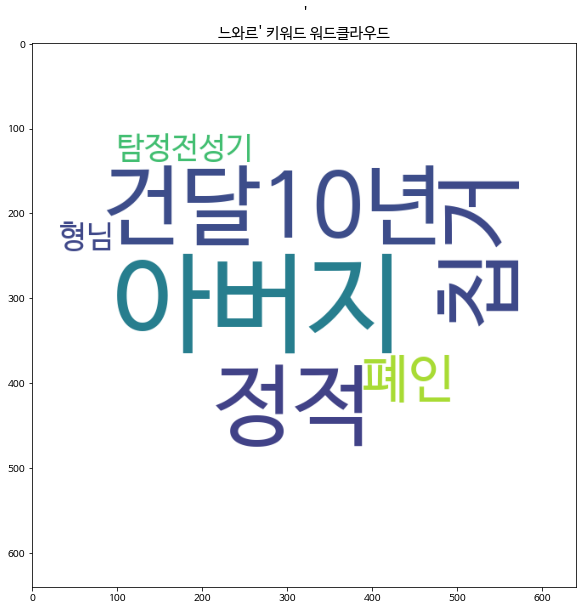

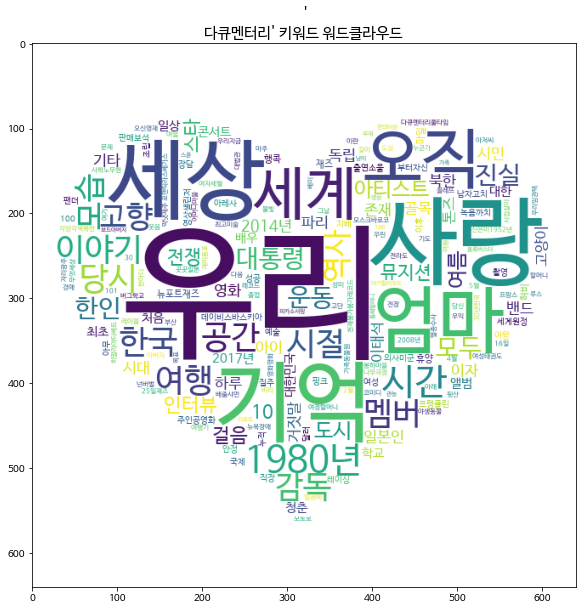

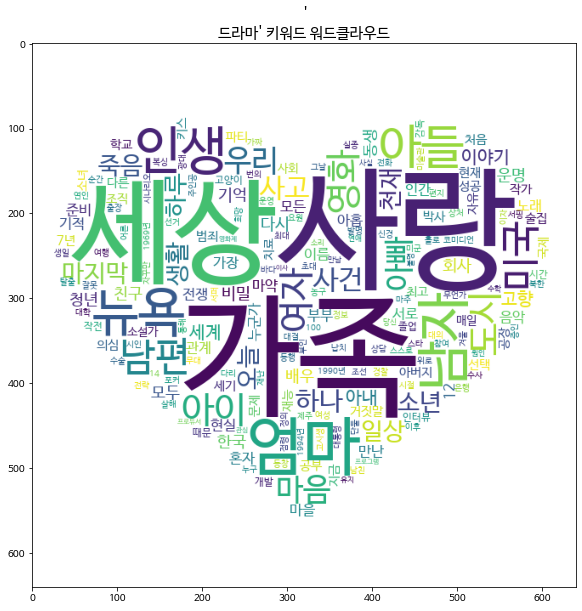

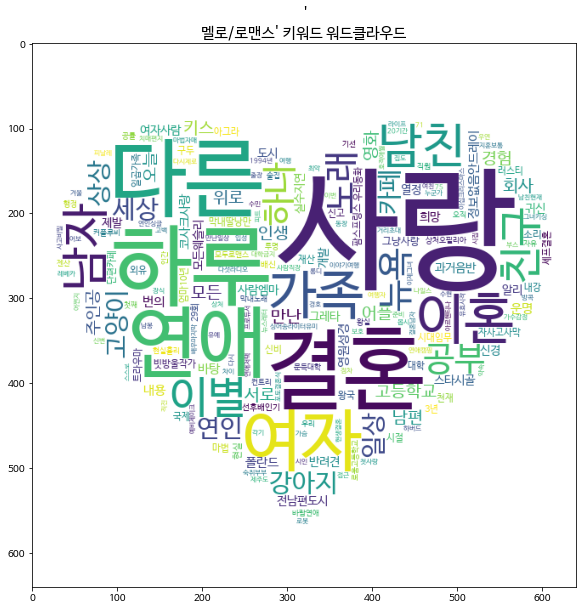

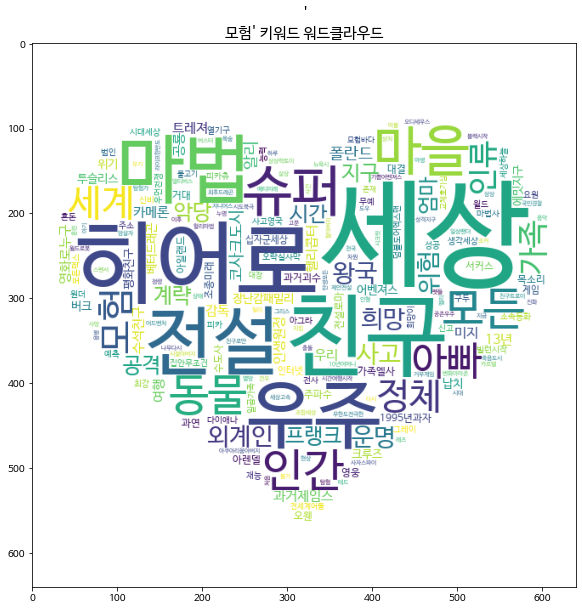

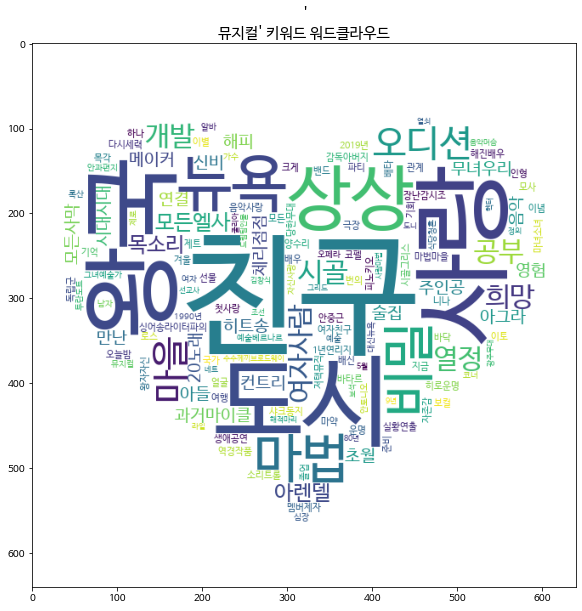

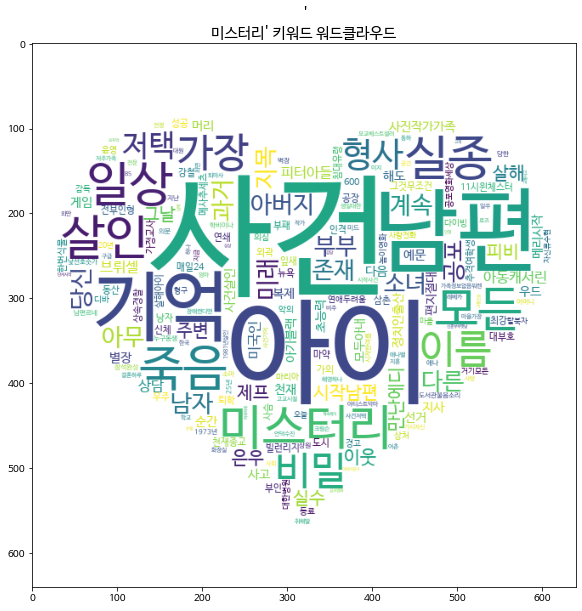

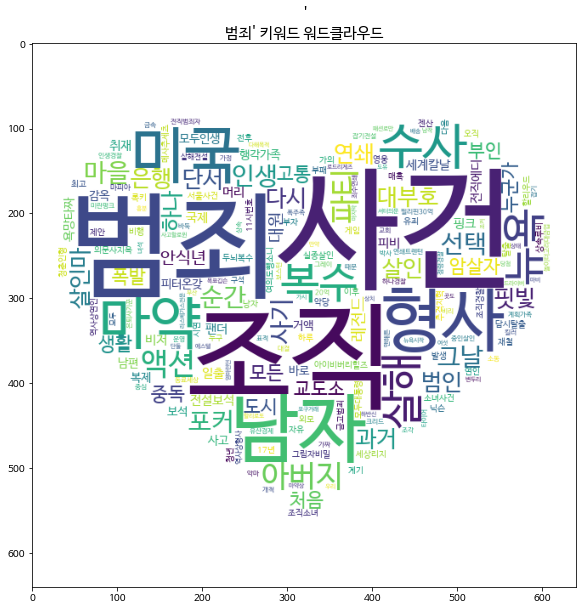

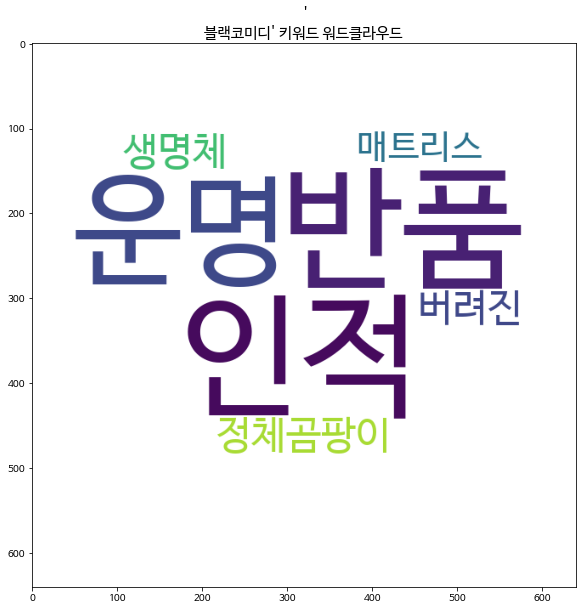

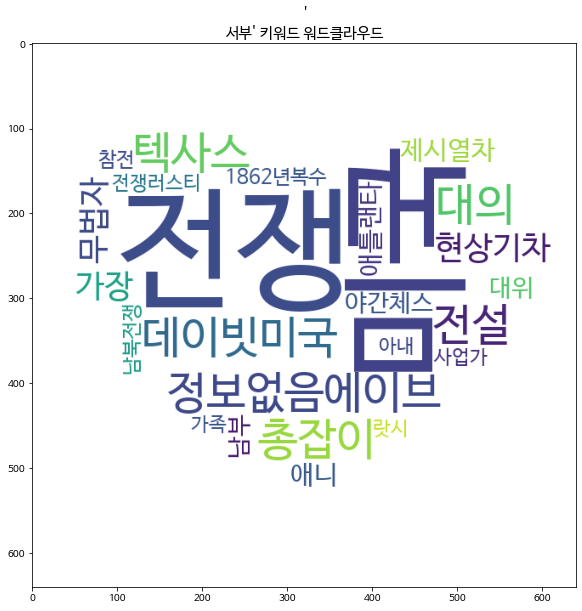

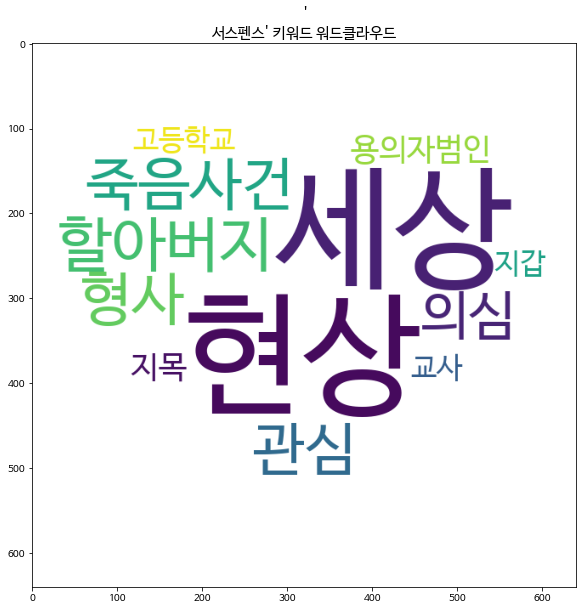

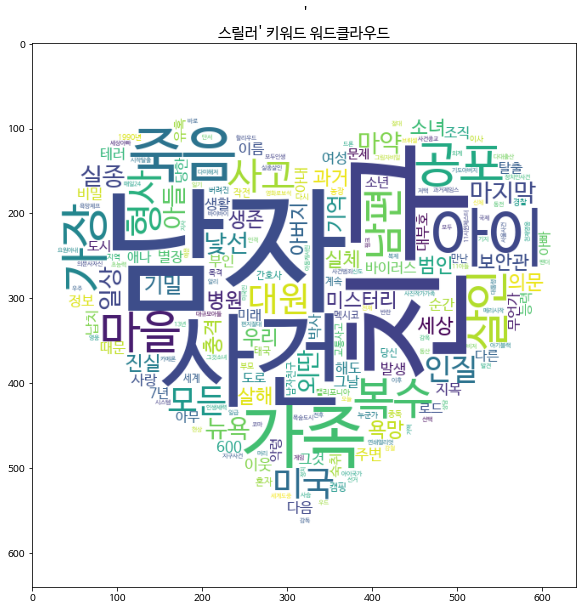

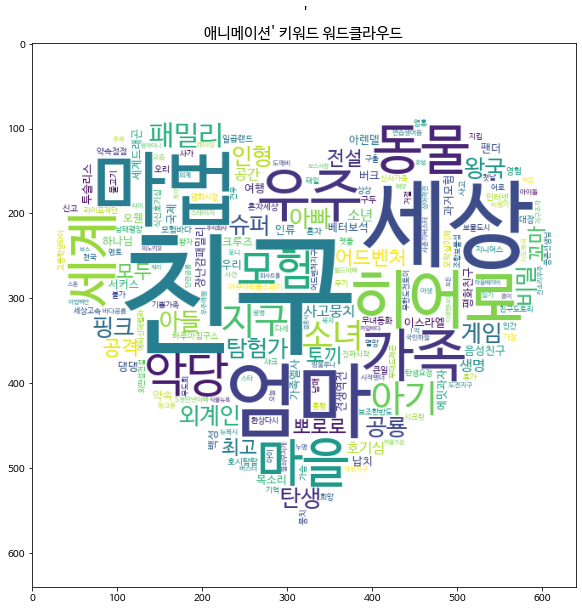

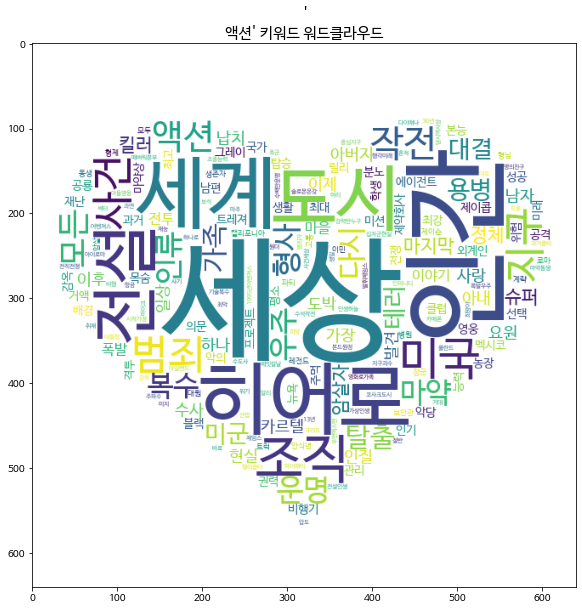

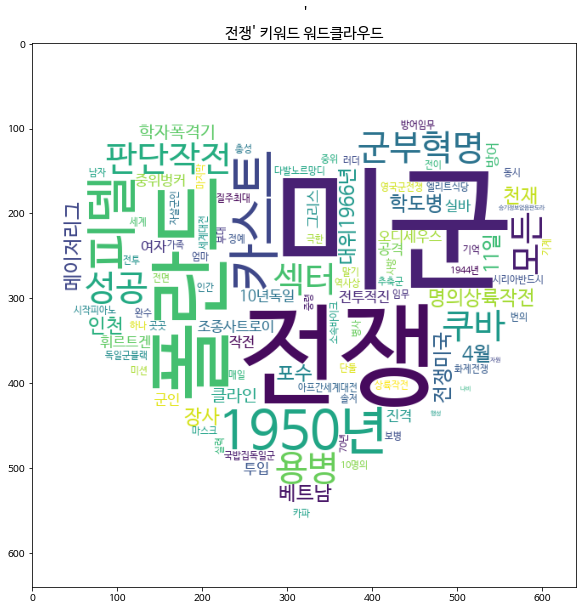

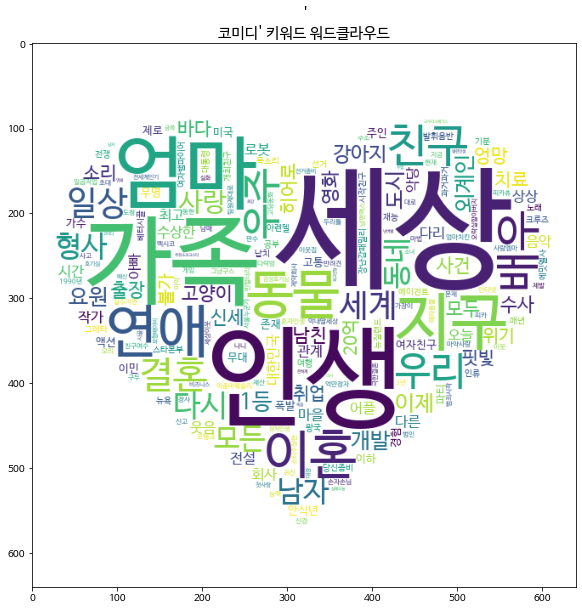

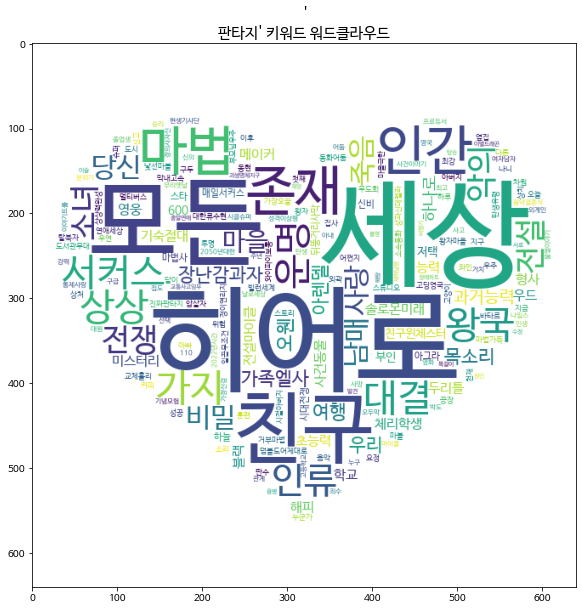

In [325]:
genre_keyword_df = pd.concat([data["keyword"],Enc.countVec(data,"genre"),], axis = 1)


icon = PIL.Image.open(f'{CFG.PATH}DATA/heart.png')
img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

stop_lst = ["자신","10년","사람","만류","불구","반드시","다한",
            "8년","애비","레이","나타","리아","안드레이","나타",
            "리아","코샤크성경","사무엘하","코샤크도시","코사크남편",
            "갖가지","에이브","러햄","린다","고철","그녀","코사크게바라",
            "리아","로부터","시작"]
            
for i in range(len(new_label)):
    # label[i]와 함께 한 장르 & 작품 수 
    keyword_lst = genre_keyword_df.drop(columns = "정보없음").groupby(new_label[i])["keyword"].sum()[1].split("|")
    
    # 불용어 제거
    keyword_lst = [ key for key in keyword_lst if key not in stop_lst]
    plt.figure(figsize = (10, 10)) 

    # 워드 클라우드
    wc = WordCloud(random_state = CFG.SEED, font_path = 'NanumBarunGothic'
    , width = 400, height = 400, background_color = 'white', mask = img)

    img_wordcloud = wc.generate_from_frequencies(collections.Counter(keyword_lst))
    plt.title(f" '\n{new_label[i]}' 키워드 워드클라우드",size = 15)
    plt.imshow(img_wordcloud)
    print()
    



# 개봉일


## 계절별로 많이 개봉하는 영화 장르


In [320]:
month_df = pd.concat([data["release_date"].apply(lambda x : x[4:6]),Enc.countVec(data,"genre")], axis = 1).rename(columns = {"release_date":"release_month"})
month_df = month_df.groupby("release_month").sum().reset_index()

# 1~12월만 남기기
for i in range(len(month_df)):
    if int(month_df["release_month"][i])<1:
        month_df = month_df.drop(i)
month_df = month_df.drop(columns = "정보없음").set_index('release_month')

season = {
    "spring" : ['03','04','05'] , 
    "summer" : ['06','07','08'],
    "autum" : ['09','10','11'],
    "winter" : [ '12','01','02']
}
spring_lst , summer_lst , autum_lst , winter_lst = [],[],[],[]


for i in range(len(month_df)):
    if month_df.index[i] in season["spring"]:
        spring_lst.append(month_df.iloc[i].to_numpy())
    elif month_df.index[i] in season["summer"]:
        summer_lst.append(month_df.iloc[i].to_numpy())
    elif month_df.index[i] in season["autum"] :
        autum_lst.append(month_df.iloc[i].to_numpy())
    elif month_df.index[i] in season["winter"] :
        winter_lst.append(month_df.iloc[i].to_numpy())


first = pd.DataFrame(sum(spring_lst), sum(summer_lst)).reset_index().rename(columns = {"index":"spring" , 0:"summer"})
last = pd.DataFrame(sum(autum_lst), sum(winter_lst)).reset_index().rename(columns = {"index":"autum" , 0:"winter"})

season_df = pd.concat( [first, last ],axis = 1).transpose()
season_df.columns = new_label
season_df = season_df.transpose()

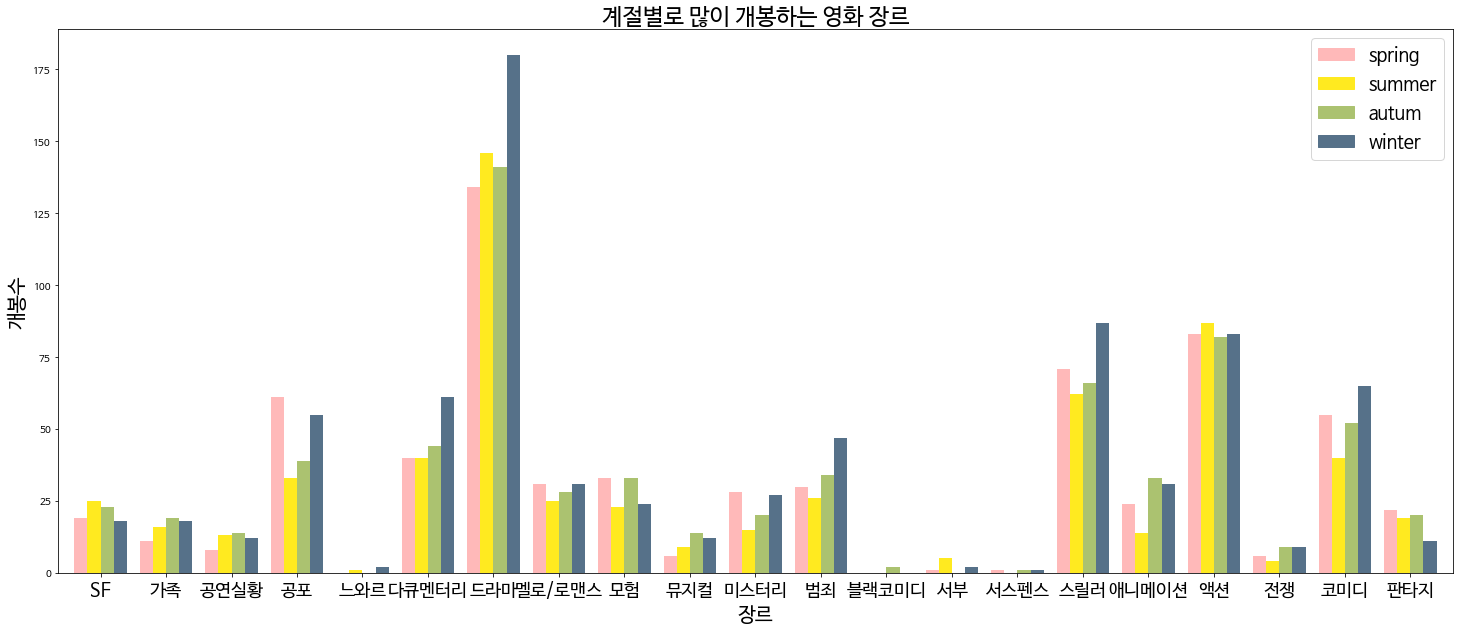

In [321]:
set_color = ['#FFB9B9'  , '#FFEA20'  ,"#ABC270","#567189" ]
draw_multi_bar( season_df ,new_label ,[ "계절별로 많이 개봉하는 영화 장르" , "장르","개봉수"] ,list(season.keys()), set_color )